# Projet 4 : nettoyage et exploration

In [93]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from statsmodels.formula.api import ols
from ast import literal_eval
from P4_functions import *

Ce projet a été réalisé avec Python 3.8.8, **Matplotlib 3.4.2**, Pandas 1.2.4, Numpy 1.20.1, Seaborn 0.11.1. Vérifiez votre numéro de version :

In [94]:
print("Python", sys.version_info.major, ".", sys.version_info.minor)
print("Matplotlib", mpl.__version__)
print("Pandas", pd.__version__)
print("Nympy", np.__version__)
print("Seaborn", sns.__version__)

Python 3 . 8
Matplotlib 3.4.2
Pandas 1.2.4
Nympy 1.20.1
Seaborn 0.11.1


In [95]:
# Pour une meilleure visualisation :
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams.update({"figure.titlesize":16, "axes.titlesize":14, "axes.labelsize":13, "xtick.labelsize":13, "ytick.labelsize":13})

## Chargement des données

Ajoutez le chemin vers le dossier contenant les fichiers .csv ci-dessous :

In [96]:
path = "E:\Mes Docs\Sciences\Cours\OpenclassroomsDS-ML\Projet4"

In [97]:
path_2015_filled = os.path.join(path, "2015-building-energy-benchmarking.csv")

In [98]:
path_2016_filled = os.path.join(path, "2016-building-energy-benchmarking.csv")

Chargement des données avec pandas.

In [99]:
data2015 = pd.read_csv(path_2015_filled, encoding="utf-8")  #, parse_dates=[1, 9, 22])

In [100]:
data2016 = pd.read_csv(path_2016_filled, encoding="utf-8")  #, parse_dates=[1, 14, 27])

In [101]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.00,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,65.00,78.90,80.30,173.50,175.10,6981428.00,7097539.00,2023032.00,1080307.00,3686160.00,12724.00,1272388.00,0.00,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.00,NaN,31.00,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.00,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,51.00,94.40,99.00,191.30,195.20,8354235.00,8765788.00,0.00,1144563.00,3905411.00,44490.00,4448985.00,0.00,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.00,NaN,31.00,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.00,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.00,Parking,100000.00,Swimming Pool,0.00,NaN,18.00,96.60,99.70,242.70,246.50,73130656.00,75506272.00,19660404.00,14583930.00,49762435.00,37099.00,3709900.00,0.00,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.00,NaN,31.00,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.00,61320,0,61320,Hotel,Hotel,61320.00,NaN,NaN,NaN,NaN,NaN,1.00,460.40,462.50,636.30,643.20,28229320.00,28363444.00,23458518.00,811521.00,2769023.00,20019.00,2001894.00,0.00,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.00,NaN,31.00,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.00,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.00,Parking,68009.00,Swimming Pool,0.00,NaN,67.00,120.10,122.10,228.80,227.10,14829099.00,15078243.00,0.00,1777841.00,6066245.00,87631.00,8763105.00,0.00,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.00,NaN,31.00,19576


In [102]:
info_data(data2015, "OSEBuildingID")

Nombre de lignes : 3340
Nombre de colonnes : 47
Nombre de données : 156980
Il y a 0 données dupliquées.


In [103]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00,0659000030,7,DOWNTOWN,47.61,-122.34,1927,1.00,12,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,60.00,81.70,84.30,182.50,189.00,7226362.50,7456910.00,2003882.00,1156514.25,3946027.00,12764.53,1276453.00,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00,0659000220,7,DOWNTOWN,47.61,-122.33,1996,1.00,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,61.00,94.80,97.90,176.10,179.40,8387933.00,8664479.00,0.00,950425.19,3242851.00,51450.82,5145082.00,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00,0659000475,7,DOWNTOWN,47.61,-122.34,1969,1.00,41,956110,196718,759392,Hotel,Hotel,756493.00,NaN,NaN,NaN,NaN,NaN,43.00,96.00,97.70,241.90,244.10,72587024.00,73937112.00,21566554.00,14515435.00,49526664.00,14938.00,1493800.00,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.00,0659000640,7,DOWNTOWN,47.61,-122.34,1926,1.00,10,61320,0,61320,Hotel,Hotel,61320.00,NaN,NaN,NaN,NaN,NaN,56.00,110.80,113.30,216.20,224.00,6794584.00,6946800.50,2214446.25,811525.31,2768924.00,18112.13,1811213.00,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.00,0659000970,7,DOWNTOWN,47.61,-122.34,1980,1.00,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.00,Parking,68009.00,Swimming Pool,0.00,NaN,75.00,114.80,118.70,211.40,215.60,14172606.00,14656503.00,0.00,1573448.62,5368607.00,88039.98,8803998.00,False,NaN,Compliant,NaN,505.01,2.88


In [104]:
info_data(data2016, "OSEBuildingID")

Nombre de lignes : 3376
Nombre de colonnes : 46
Nombre de données : 155296
Il y a 0 données dupliquées.


## Comparaison des données de 2015 et 2016

Etant donné que les 2 années se suivent, les relevés concernent des périodes proches dans le temps et il ne devrait pas y avoir de différence majeure (hors évènement climatique particulier qui pousserait à la consommation d'énergie par exemple). On devrait pouvoir les considérer comme un seul et même dataset. On va explorer les similarités/différences afin de confirmer/infirmer cette hypothèse, et de voir si une des deux année est à privilégier dans le choix des données.

### Colonnes

In [105]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [106]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Les colonnes ne sont pas les mêmes sur les 2 dataframes. On va comparer.

In [107]:
def compare_lists(list1, list2):
    a = set(list1)
    b = set(list2)
    result = {"intersection": list(a & b), "list1only":list(a-b), "list2only": list(b-a)}
    return result

In [108]:
col_compare = compare_lists(data2015.columns, data2016.columns)
col_compare 

{'intersection': ['CouncilDistrictCode',
  'TaxParcelIdentificationNumber',
  'SiteEnergyUseWN(kBtu)',
  'ThirdLargestPropertyUseTypeGFA',
  'Neighborhood',
  'SecondLargestPropertyUseTypeGFA',
  'Electricity(kWh)',
  'ComplianceStatus',
  'YearBuilt',
  'SourceEUI(kBtu/sf)',
  'SecondLargestPropertyUseType',
  'SteamUse(kBtu)',
  'NaturalGas(kBtu)',
  'Electricity(kBtu)',
  'OSEBuildingID',
  'ListOfAllPropertyUseTypes',
  'LargestPropertyUseType',
  'ThirdLargestPropertyUseType',
  'Outlier',
  'BuildingType',
  'PropertyGFAParking',
  'NumberofFloors',
  'PrimaryPropertyType',
  'DataYear',
  'YearsENERGYSTARCertified',
  'SiteEUI(kBtu/sf)',
  'PropertyGFATotal',
  'PropertyName',
  'SourceEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)',
  'NaturalGas(therms)',
  'PropertyGFABuilding(s)',
  'LargestPropertyUseTypeGFA',
  'SiteEUIWN(kBtu/sf)',
  'ENERGYSTARScore',
  'DefaultData',
  'NumberofBuildings'],
 'list1only': ['Location',
  'Seattle Police Department Micro Community Policing Plan A

Principales différences : 
* la localisation est sous forme de dictionnaire en une seule colonne dans les données de 2015, mais en plusieurs colonnes (Address, City, State, ZipCode, Latitude, Longitude) dans les données de 2016
* Intitulé des colonnes différent pour les émissions de gaz à effet de serre (GHGEmissions(MetricTonsCO2e) et GHGEmissionsIntensity(kgCO2e/ft2) vs. TotalGHGEmissions etGHGEmissionsIntensity)
* Une colonne OtherFuelUse dans les données de 2015 non présente pour 2016
* Case Comment vs. Comments
* Des infos supplémentaires (2010 Census Tracts, City Council Districts, etc...) dans les données de de 2015 non présentes pour 2016

In [109]:
# Renommer quelques colonnes pour la consistance :
data2015.rename(columns={"Comment":"Comments", 
    "GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions", 
    "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity"},inplace=True)

In [110]:
data2015.loc[0,"Location"]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [111]:
data2016.loc[0,"Address"]

'405 Olive way'

In [112]:
# Correction des adresses
data2015_new = pd.concat([data2015.drop(["Location"], axis=1), data2015["Location"]\
    .apply(lambda x: pd.Series(literal_eval(x)))], axis=1)
data2015_new2 = pd.concat([data2015_new.drop(["human_address"], axis=1), data2015_new["human_address"]\
    .apply(lambda x: pd.Series(literal_eval(x)))], axis=1)
    
data2015_new2.drop(columns="Zip Codes", inplace=True)
data2015_new2.rename(columns={"latitude":"Latitude", 
    "longitude":"Longitude", 
    "address":"Address", 
    "city":"City", 
    "state":"State", 
    "zip":"ZipCode"}, inplace=True)

data2015 = data2015_new2.copy()

Les bâtiments ne se retrouvent pas tous les 2 années également.

In [113]:
OSEBuildingID = compare_lists(data2015["OSEBuildingID"], data2016["OSEBuildingID"])
OSEBuildingID

{'intersection': [1,
  2,
  24579,
  3,
  5,
  24581,
  8,
  9,
  10,
  11,
  12,
  13,
  24585,
  15,
  16,
  17,
  18,
  19,
  24587,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  24607,
  40,
  41,
  24614,
  24617,
  46,
  24624,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  24631,
  62,
  63,
  24640,
  65,
  66,
  67,
  68,
  69,
  70,
  24643,
  24645,
  73,
  24646,
  24649,
  24650,
  77,
  24653,
  24657,
  82,
  24659,
  84,
  85,
  86,
  87,
  24660,
  89,
  24663,
  24664,
  24667,
  24668,
  95,
  96,
  24673,
  98,
  100,
  102,
  103,
  104,
  106,
  107,
  41068,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  24693,
  24700,
  125,
  24701,
  127,
  24705,
  130,
  131,
  132,
  24708,
  24710,
  24711,
  136,
  137,
  138,
  139,
  140,
  24712,
  24714,
  24716,
  144,
  145,
  24717,
  147,
  148,
  24720,
  24722,
  24725,
  24726,
  1

In [114]:
print(f"Il y a {len(OSEBuildingID['intersection'])} bâtiments ayant des données pour 2015 et 2016.")
print(f"Il y a {len(OSEBuildingID['list1only'])} bâtiments ayant des données pour 2015 uniquement.")
print(f"Il y a {len(OSEBuildingID['list2only'])} bâtiments ayant des données pour 2016 uniquement.")

Il y a 3284 bâtiments ayant des données pour 2015 et 2016.
Il y a 56 bâtiments ayant des données pour 2015 uniquement.
Il y a 92 bâtiments ayant des données pour 2016 uniquement.


### Type de bâtiments

In [115]:
print(2015, list(data2015["BuildingType"].unique()))
print("==========================================")
print(2016, list(data2016["BuildingType"].unique()))

2015 ['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)', 'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus', 'Multifamily HR (10+)']
2016 ['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)', 'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)', 'Multifamily HR (10+)', 'Nonresidential WA']


Une catégorie `Nonresidential WA` dans les données de 2016 non présente en 2015.

Il faudra supprimer les bâtiments résidentiels (`Multifamily`).

Text(0.5, 1.0, '% des différents types de bâtiments pour 2016')

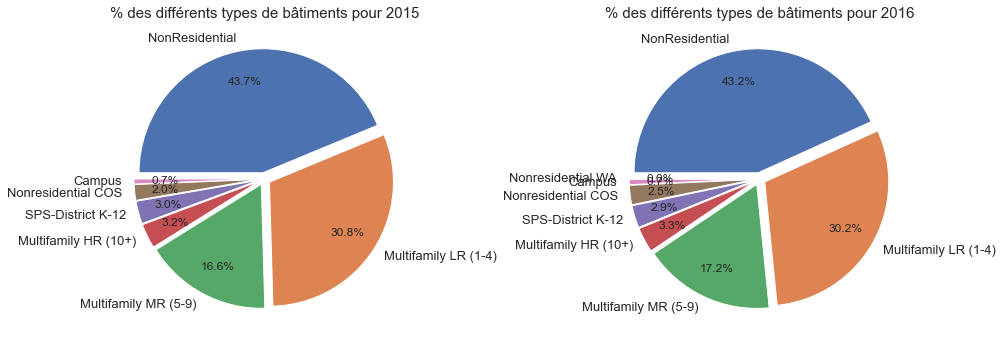

In [116]:
building_type_2015_p = prct_cat(data2015, "BuildingType", "OSEBuildingID")
building_type_2016_p = prct_cat(data2016, "BuildingType", "OSEBuildingID")

fig, ax = plt.subplots(1, 2, figsize=(14,7), tight_layout=True)

labels1 = building_type_2015_p.index
labels2 = building_type_2016_p.index

p1 = ax[0].pie(x=building_type_2015_p, 
    autopct="%.1f%%", 
    explode=[0.05]*building_type_2015_p.size, 
    labels=labels1, 
    pctdistance=0.75, 
    startangle=180, 
    counterclock=False)

p2 = ax[1].pie(x=building_type_2016_p, 
    autopct="%.1f%%", 
    explode=[0.05]*building_type_2016_p.size, 
    labels=labels2, 
    pctdistance=0.75, 
    startangle=180, 
    counterclock=False)

ax[0].set_title("% des différents types de bâtiments pour 2015", fontsize=15)
ax[1].set_title("% des différents types de bâtiments pour 2016", fontsize=15)

#fig.savefig("type_buildings_2015_2016.png", bbox_inches="tight", dpi=150);

In [117]:
print("Primary Property Type 2015")
print(list(data2015["PrimaryPropertyType"].unique()))
print("==========================================")
print("Primary Property Type 2016")
print(2016, list(data2016["PrimaryPropertyType"].unique()))

Primary Property Type 2015
['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property', 'K-12 School', 'College/University', 'Small- and Mid-Sized Office', 'Self-Storage Facility\n', 'Distribution Center', 'Large Office', 'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community', 'Medical Office', 'Hospital', 'Residence Hall/Dormitory', 'Non-Refrigerated Warehouse', 'Distribution Center\n', 'SPS-District K-12', 'Worship Facility', 'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility', 'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n', 'Restaurant']
Primary Property Type 2016
2016 ['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property', 'K-12 School', 'University', 'Small- and Mid-Sized Office', 'Self-Storage Facility', 'Warehouse', 'Large Office', 'Senior Care Community', 'Medical Office', 'Retail Store', 'Hospital', 'Residence Hall', 'Distribution Center', 'Worship Facility', 'Low-Rise Multifamily', 'Supermarket / Grocery Store', 'Laborat

Typos `\n` à corriger(`Self-Storage Facility\n`, `Distribution Center\n`, `Restaurant\n`) sur données 2015.

In [118]:
print("Neighborhood 2015")
print(list(data2015["Neighborhood"].unique()))
print("==========================================")
print("Neighborhood 2016")
print(list(data2016["Neighborhood"].unique()))

Neighborhood 2015
['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH', 'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH', 'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE']
Neighborhood 2016
['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH', 'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH', 'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE', 'Ballard', 'North', 'Delridge', 'Northwest', 'DELRIDGE NEIGHBORHOODS']


Problèmes de case à corriger sur les typos de 2016.

In [119]:
# Correction espaces, tabulations :
data2015["PrimaryPropertyType"] = data2015["PrimaryPropertyType"].str.strip()
# Correction case
data2016["Neighborhood"] = data2016["Neighborhood"].str.upper()

On garde uniquement les bâtiments à usage non résidentiel en filtrant avec la colonne `BuildingType`.

In [120]:
print(f"{len(data2015[data2015['BuildingType'].str.contains('Multifamily')])} bâtiments 'multifamily' à supprimer dans les données de 2015.")
print(f"{len(data2016[data2016['BuildingType'].str.contains('Multifamily')])} bâtiments 'multifamily' à supprimer dans les données de 2016.")

1690 bâtiments 'multifamily' à supprimer dans les données de 2015.
1708 bâtiments 'multifamily' à supprimer dans les données de 2016.


In [121]:
data2015_clean = data2015.drop(labels = data2015[data2015["BuildingType"].str.contains("Multifamily")].index)
data2016_clean = data2016.drop(labels = data2016[data2016["BuildingType"].str.contains("Multifamily")].index)

La colonne `PrimaryPropertyType` contient aussi des types `Multifamily`, que l'on supprime :

In [122]:
print(f"{len(data2015_clean[data2015_clean['PrimaryPropertyType'].str.contains('Multifamily')])} bâtiments 'multifamily' à supprimer dans les données de 2015.")
print(f"{len(data2016_clean[data2016_clean['PrimaryPropertyType'].str.contains('Multifamily')])} bâtiments 'multifamily' à supprimer dans les données de 2016.")

data2015_clean.drop(labels = data2015_clean[data2015_clean["PrimaryPropertyType"].str.contains("Multifamily")].index, 
    inplace=True)
data2016_clean.drop(labels = data2016_clean[data2016_clean["PrimaryPropertyType"].str.contains("Multifamily")].index, 
    inplace=True)

2 bâtiments 'multifamily' à supprimer dans les données de 2015.
3 bâtiments 'multifamily' à supprimer dans les données de 2016.


In [123]:
print("2015")
info_data(data2015_clean, "OSEBuildingID")
print("2016")
info_data(data2016_clean, "OSEBuildingID")

2015
Nombre de lignes : 1648
Nombre de colonnes : 51
Nombre de données : 84048
Il y a 0 données dupliquées.
2016
Nombre de lignes : 1665
Nombre de colonnes : 46
Nombre de données : 76590
Il y a 0 données dupliquées.


In [124]:
OSEBuildingID_clean = compare_lists(data2015_clean["OSEBuildingID"], data2016_clean["OSEBuildingID"])
print(f"Il y a {len(OSEBuildingID_clean['intersection'])} bâtiments ayant des données pour 2015 et 2016.")
print(f"Il y a {len(OSEBuildingID_clean['list1only'])} bâtiments ayant des données pour 2015 uniquement.")
print(f"Il y a {len(OSEBuildingID_clean['list2only'])} bâtiments ayant des données pour 2016 uniquement.")

Il y a 1617 bâtiments ayant des données pour 2015 et 2016.
Il y a 31 bâtiments ayant des données pour 2015 uniquement.
Il y a 48 bâtiments ayant des données pour 2016 uniquement.


### Colonnes Compliance, Default Data, Outlier, Comments

In [125]:
print("ComplianceStatus 2015")
print(data2015_clean["ComplianceStatus"].unique())
print("=======================================")
print("ComplianceStatus 2016")
print(data2016_clean["ComplianceStatus"].unique())

ComplianceStatus 2015
['Compliant']
ComplianceStatus 2016
['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']


Le dataframe de 2016 semble apporter plus d'informations et signale des données manquante ou des erreurs sur les donnnées.

In [126]:
data2016_clean[data2016_clean["ComplianceStatus"]=="Missing Data"].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.00,0688000090,3,CENTRAL,47.62,-122.31,1955,1.00,1,126351,0,126351,K-12 School,K-12 School,126351.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False,NaN,Missing Data,NaN,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.00,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63,-122.35,1989,1.00,2,51582,0,51582,K-12 School,K-12 School,55166.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,438691.69,1496816.00,0.00,0.00,False,NaN,Missing Data,NaN,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.00,2518400005,1,SOUTHWEST,47.51,-122.38,1948,1.00,2,53352,0,53352,K-12 School,K-12 School,65568.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,176088.09,600813.00,0.00,0.00,False,NaN,Missing Data,NaN,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.00,1324039116,1,DELRIDGE,47.56,-122.36,1999,1.00,3,74468,0,74468,K-12 School,K-12 School,75364.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,497706.81,1698176.00,0.00,0.00,False,NaN,Missing Data,NaN,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.00,1524049002,2,SOUTHEAST,47.57,-122.29,1991,1.00,2,58933,0,58933,K-12 School,K-12 School,60725.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,687906.88,2347138.00,0.00,0.00,False,NaN,Missing Data,NaN,16.36,0.28


En effet, les lignes indiquées comme "Missing Data" ont une consommation d'énergie de 0, il faudra les enlever.

In [127]:
data2016_clean[data2016_clean["ComplianceStatus"]=="Non-Compliant"]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.00,0942000045,7,DOWNTOWN,47.61,-122.34,1958,1.00,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.00,Data Center,39336.00,Parking,25000.00,NaN,NaN,297.40,299.20,909.60,911.50,41399504.00,41650404.00,0.00,11663150.00,39794668.00,16048.31,1604831.00,False,NaN,Non-Compliant,High outlier,362.66,2.10
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.00,1978200105,7,DOWNTOWN,47.61,-122.33,1990,1.00,6,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.00,Parking,686750.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False,NaN,Non-Compliant,NaN,0.00,0.00
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.00,5335200380,4,NORTHEAST,47.66,-122.32,1987,1.00,2,69492,0,69492,Retail Store,Retail Store,69800.00,Other,0.00,NaN,NaN,NaN,100.00,4.60,4.60,14.30,14.30,318962.81,318962.81,0.00,93482.60,318963.00,0.00,0.00,False,NaN,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.00,5247800200,2,DOWNTOWN,47.60,-122.33,1913,5.00,7,154159,0,154159,Office,Office,193154.00,NaN,NaN,NaN,NaN,NaN,100.00,58.00,58.80,28.00,28.70,11195917.00,11348758.00,0.00,471503.00,1608768.00,3430.50,343050.00,False,NaN,Non-Compliant,Low outlier,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.00,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62,-122.36,2000,1.00,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.00,Parking,42500.00,Data Center,4778.00,NaN,1.00,311.70,311.70,978.90,978.90,27137190.00,27137190.00,0.00,7953454.50,27137187.00,0.00,0.00,False,NaN,Non-Compliant,High outlier,189.18,1.46
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.00,0939000245,7,DOWNTOWN,47.60,-122.33,1924,NaN,4,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.00,1975700135,7,DOWNTOWN,47.61,-122.34,1903,1.00,3,57720,0,57720,Office,Office,25000.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,3.00,3.00,24105.50,24105.50,0.00,7064.90,24105.00,0.00,0.00,False,NaN,Non-Compliant,Low outlier,0.17,0.00
1295,21474,2016,NonResidential,Other,The Lusty Lady,1315 1st Ave,Seattle,WA,98101.00,1976200060,7,DOWNTOWN,47.61,-122.34,1900,1.00,3,49760,0,49760,Other,Other,24019.00,NaN,NaN,NaN,NaN,NaN,NaN,1.80,1.80,5.80,5.80,44293.50,44293.50,0.00,12981.70,44294.00,0.00,0.00,False,NaN,Non-Compliant,Low outlier,0.31,0.01
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,98126.00,2858600090,1,SOUTHWEST,47.52,-122.38,1971,1.00,1,23772,0,23772,Worship Facility,Worship Facility,23772.00,NaN,NaN,NaN,NaN,NaN,100.00,4.20,4.20,13.30,13.30,100841.70,100841.70,0.00,29555.00,100842.00,0.00,0.00,False,NaN,Non-Compliant,Low outlier,0.70,0.03
1945,23912,2016,NonResiden

Les données taguées comme "Non-Compliant" sont des outliers ou des lignes avec données manquantes.

In [128]:
data2016_clean[data2016_clean["ComplianceStatus"]=="Error - Correct Default Data"]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.00,1102000138,2,SOUTHEAST,47.55,-122.27,1961,1.00,2,56228,0,56228,K-12 School,K-12 School,58916.00,NaN,NaN,NaN,NaN,NaN,95.00,26.10,29.10,60.70,64.60,1539478.50,1713623.50,0.00,274605.91,936955.00,6025.23,602523.00,True,NaN,Error - Correct Default Data,NaN,38.53,0.69
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.00,0752000170,5,NORTH,47.71,-122.29,1949,1.00,2,160645,0,160645,K-12 School,K-12 School,164229.00,NaN,NaN,NaN,NaN,NaN,75.00,41.30,47.50,68.10,75.70,6779173.00,7800349.50,0.00,570809.19,1947601.00,48315.72,4831572.00,True,NaN,Error - Correct Default Data,NaN,270.18,1.68
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.00,0425049022,4,NORTHEAST,47.68,-122.29,1950,1.00,2,175565,0,175565,K-12 School,K-12 School,182861.00,NaN,NaN,NaN,NaN,NaN,88.00,35.00,40.10,55.00,60.40,6399127.50,7329817.50,0.00,468840.50,1599684.00,47994.43,4799443.00,True,NaN,Error - Correct Default Data,NaN,266.05,1.52
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.00,1624049214,2,GREATER DUWAMISH,47.56,-122.31,1957,1.00,1,130862,0,130862,K-12 School,K-12 School,134446.00,NaN,NaN,NaN,NaN,NaN,61.00,48.00,54.30,85.60,93.50,6456026.00,7300977.50,0.00,663194.50,2262820.00,41932.07,4193207.00,True,NaN,Error - Correct Default Data,NaN,238.48,1.82
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.00,1704900242,2,SOUTHEAST,47.55,-122.28,1989,1.00,3,59955,0,59955,K-12 School,K-12 School,59955.00,NaN,NaN,NaN,NaN,NaN,93.00,27.20,29.20,78.70,83.00,1633399.38,1749171.25,0.00,420989.41,1436416.00,1969.83,196983.00,True,NaN,Error - Correct Default Data,NaN,20.48,0.34
88,130,2016,SPS-District K-12,K-12 School,McClure Middle,1915 1st Ave. W.,Seattle,WA,98119.00,1794501220,7,MAGNOLIA / QUEEN ANNE,47.64,-122.36,1964,1.00,2,93218,0,93218,K-12 School,K-12 School,93218.00,NaN,NaN,NaN,NaN,NaN,86.00,31.00,34.50,65.90,70.80,2887392.00,3216155.00,0.00,435743.81,1486758.00,14006.34,1400634.00,True,NaN,Error - Correct Default Data,NaN,84.75,0.91
92,137,2016,SPS-District K-12,K-12 School,Broadview-Thomson K-8,13052 Greenwood Ave. N.,Seattle,WA,98133.00,1926049025,5,NORTHWEST,47.72,-122.35,1963,1.00,2,131013,0,131013,K-12 School,K-12 School,131909.00,NaN,NaN,NaN,NaN,NaN,88.00,29.50,32.50,59.10,62.90,3894584.50,4290831.50,0.00,520365.69,1775488.00,21190.97,2119097.00,True,NaN,Error - Correct Default Data,NaN,124.92,0.95
99,148,2016,SPS-District K-12,K-12 School,West Woodland Elementary,5601 4th Ave. N.W.,Seattle,WA,98107.00,2768000375,6,BALLARD,47.67,-122.36,1991,1.00,2,55513,0,55513,K-12 School,K-12 School,59097.00,NaN,NaN,NaN,NaN,NaN,93.00,25.60,27.10,80.40,85.00,1513570.75,1598852.62,0.00,443602.19,1513571.00,0.00,0.00,True,NaN,Error - Correct Default Data,NaN,10.55,0.19
103,169,2016,SPS-District K-12,K-12 School,Franklin High,3013 S. Mt. Baker Blvd.,Seattle,WA,98144.00,5700000455,2,SOUTHEAST,47.58,-122.29,1990,1.00,4,289588,0,289588,K-12 School,K-12 School,289588.00,NaN,NaN,NaN,NaN,NaN,90.00,3

Signification de "Error - Correct Default Data" ?

Valeurs de la colonne DefaultData ?

In [129]:
print("DefaultData 2015")
print(data2015_clean["DefaultData"].unique())
print("=======================================")
print("DefaultData 2016")
print(data2016_clean["DefaultData"].unique())

DefaultData 2015
['No' 'Yes' nan]
DefaultData 2016
[False  True]


On va modifier les données de 2015 pour mettre True ou False à la place de Yes-No (les booléans faciliteront la manipulation du dataframe).

In [130]:
# Correction Yes/No en True/False dans les données de 2015
data2015_clean["DefaultData"] = data2015_clean["DefaultData"].map({"Yes":True, "No":False, np.nan:np.nan})

In [131]:
print("Outlier 2015")
print(data2015_clean["Outlier"].unique())
print("=======================================")
print("Outlier 2016")
print(data2016_clean["Outlier"].unique())

Outlier 2015
[nan 'High Outlier' 'Low Outlier']
Outlier 2016
[nan 'High outlier' 'Low outlier']


Encore quelques problèmes de typos à corriger pour homogénéiser :

In [132]:
data2015_clean["Outlier"].replace(["High Outlier", "Low Outlier"], ["High outlier", "Low outlier"], inplace=True)

In [133]:
print(f"Il y a {len(data2015_clean[data2015_clean['Outlier'].str.contains('outlier').notnull()])} données d'outliers en 2015.")
print(f"Il y a {len(data2016_clean[data2016_clean['Outlier'].str.contains('outlier').notnull()])} données d'outliers en 2016.")

Il y a 31 données d'outliers en 2015.
Il y a 16 données d'outliers en 2016.


In [134]:
print("Comments 2015")
print(data2015_clean["Comments"].unique())
print("=======================================")
print("Comments 2016")
print(data2016_clean["Comments"].unique())

Comments 2015
[nan
 'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.'
 "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com."
 "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re"
 'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu'
 'Construction completed in mid 2015. The building was unoccupied for most of 2015.'
 'Under construction starting

Les commentaires indiquent des bâtiments en cours de construction ou des détails sur la gestion de l'énergie d'un campus.

### Taux de remplissage des colonnes

In [135]:
nan_col(data2015_clean)

,% NaN,% dispo
OSEBuildingID,0.00,100.00
DataYear,0.00,100.00
BuildingType,0.00,100.00
PrimaryPropertyType,0.00,100.00
PropertyName,0.00,100.00
TaxParcelIdentificationNumber,0.06,99.94
CouncilDistrictCode,0.00,100.00
Neighborhood,0.00,100.00
YearBuilt,0.00,100.00
NumberofBuildings,0.00,100.00


In [136]:
nan_col(data2016_clean)

,% NaN,% dispo
OSEBuildingID,0.00,100.00
DataYear,0.00,100.00
BuildingType,0.00,100.00
PrimaryPropertyType,0.00,100.00
PropertyName,0.00,100.00
Address,0.00,100.00
City,0.00,100.00
State,0.00,100.00
ZipCode,0.96,99.04
TaxParcelIdentificationNumber,0.00,100.00


A priori, les données sont bien remplies sur les 2 dataset (mais on sait déjà que pour 2016 il y a des données manquantes). Les colonnes ayant peu de données sont peu importantes (YearsENERGYSTARCertified, Comments, City Council Districts...).

On va simplement remplacer les `NaN`de `SecondLargestPropertyUseType`et `ThirdLargestPropertyUseType` afin de pouvoir conserver ces colonnes dans les modèles de machine learning et considérer `Aucun` comme une catégorie.

In [137]:
data2015_clean["SecondLargestPropertyUseType"].replace([np.nan, "Aucun"], inplace=True)
data2015_clean["ThirdLargestPropertyUseType"].replace([np.nan, "Aucun"], inplace=True)

data2016_clean["SecondLargestPropertyUseType"].replace([np.nan, "Aucun"], inplace=True)
data2016_clean["ThirdLargestPropertyUseType"].replace([np.nan, "Aucun"], inplace=True)

# Etrangement, le remplacement ne se fait pas sur la première ligne des dataset, donc manuellement :
data2015_clean.loc[0, "ThirdLargestPropertyUseType"] = "Aucun"
data2016_clean.loc[0, ["SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]] = "Aucun"

In [138]:
nan_col(data2015_clean)

,% NaN,% dispo
OSEBuildingID,0.00,100.00
DataYear,0.00,100.00
BuildingType,0.00,100.00
PrimaryPropertyType,0.00,100.00
PropertyName,0.00,100.00
TaxParcelIdentificationNumber,0.06,99.94
CouncilDistrictCode,0.00,100.00
Neighborhood,0.00,100.00
YearBuilt,0.00,100.00
NumberofBuildings,0.00,100.00


In [139]:
nan_col(data2016_clean)

,% NaN,% dispo
OSEBuildingID,0.00,100.00
DataYear,0.00,100.00
BuildingType,0.00,100.00
PrimaryPropertyType,0.00,100.00
PropertyName,0.00,100.00
Address,0.00,100.00
City,0.00,100.00
State,0.00,100.00
ZipCode,0.96,99.04
TaxParcelIdentificationNumber,0.00,100.00


Toutes les colonnes d'intéret sont maintenant remplies.

### Lignes avec données manquantes

Regardons maintenant les lignes contenant des NaN. On sait déjà que certaines lignes sont indiquée avec "Missing Data" dans "ComplianceStatus". On regarde les lignes ayant des NaN pour au moins une des colonnes jugée essentielle (nombre de bâtiments, nombre d'étages, surface totale, surface des bâtiments, usage principale, consommation du site et émissions GES du site).

In [140]:
print(f"Il y a {len(data2015_clean[data2015_clean[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].isnull().any(axis=1)])} lignes avec au moins 1 donnée essentielle manquante pour 2015.")
print(f"Il y a {len(data2016_clean[data2016_clean[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].isnull().any(axis=1)])} lignes avec au moins 1 donnée essentielle manquante pour 2016.")
print(f"Il y a aussi {len(data2016_clean[data2016_clean['ComplianceStatus']=='Missing Data'])} données indiquées comme 'Missing Data' pour 2016.")

Il y a 80 lignes avec au moins 1 donnée essentielle manquante pour 2015.
Il y a 6 lignes avec au moins 1 donnée essentielle manquante pour 2016.
Il y a aussi 14 données indiquées comme 'Missing Data' pour 2016.


In [141]:
# Exemple de lignes avec données manquantes pour 2015.
data2015_clean[data2015_clean[["NumberofBuildings", "NumberofFloors", 
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseType", 
    "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].isnull().any(axis=1)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Latitude,Longitude,Address,City,State,ZipCode
10,15,2015,NonResidential,Hotel,HOTEL MONACO,942000145,7,DOWNTOWN,1969,1,11.00,153163,19279,133884,NaN,NaN,NaN,Parking,NaN,Swimming Pool,NaN,NaN,48.00,101.10,107.20,200.80,205.20,14719853.00,15615929.00,3623542.00,1857347.00,6337531.00,47590.00,4759044.00,0.00,576.63,3.59,False,NaN,Compliant,NaN,NaN,14.00,NaN,19.00,47.60712147,-122.33431932,1101 4TH AVE,SEATTLE,WA,98101
14,19,2015,NonResidential,Hotel,HOTEL VINTAGE PARK,942000265,7,DOWNTOWN,1922,1,11.00,67390,0,67390,NaN,NaN,NaN,Parking,NaN,Swimming Pool,NaN,NaN,14.00,166.10,175.70,317.40,326.00,10711451.00,11329230.00,4403788.00,1198487.00,4089407.00,22184.00,2218425.00,0.00,486.25,6.95,False,NaN,Compliant,NaN,NaN,14.00,NaN,19.00,47.60761642,-122.3323288,1100 5TH AVE,SEATTLE,WA,98101
19,25,2015,NonResidential,Hotel,DOUBLE TREE ARCTIC CLUB HOTEL - SEATTLE,942000610,7,DOWNTOWN,1916,1,10.00,104352,0,104352,NaN,NaN,NaN,Restaurant,NaN,Office,NaN,NaN,83.00,75.20,74.90,119.50,118.60,7845112.00,7816594.00,3205497.00,524792.00,1790665.00,28490.00,2849024.00,0.00,411.22,3.87,False,NaN,Compliant,NaN,NaN,14.00,NaN,19.00,47.60397899,-122.3320576,700 3RD AVE,SEATTLE,WA,98104
35,46,2015,NonResidential,Distribution Center,SEATTLE WAREHOUSE OFFICE BUILDING,323049024,2,GREATER DUWAMISH,1961,7,2.00,714095,0,714095,NaN,NaN,NaN,K-12 School,NaN,Other - Entertainment/Public Assembly,NaN,NaN,1.00,66.90,64.70,210.00,203.30,47843892.00,46313516.00,0.00,14022240.00,47845869.00,0.00,0.00,0.00,333.54,0.18,False,NaN,Compliant,NaN,NaN,58.00,NaN,37.00,47.5106034,-122.29027588,3301 S NORFOLK ST,SEATTLE,WA,98118
52,67,2015,NonResidential,Hotel,QUALITY INN & SUITES - SEATTLE,1991200730,7,LAKE UNION,1959,1,5.00,113173,42546,70627,NaN,NaN,NaN,Other - Entertainment/Public Assembly,NaN,Retail Store,NaN,NaN,86.00,70.60,73.10,166.60,174.30,4988241.00,5160438.00,0.00,915988.00,3125480.00,18629.00,1862890.00,0.00,120.73,0.95,False,NaN,Compliant,NaN,NaN,56.00,NaN,40.00,47.62037281,-122.3441465,618 JOHN ST,SEATTLE,WA,98109
62,87,2015,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),2518400005,1,SOUTHWEST,1948,1,2.00,53352,0,53352,K-12 School,K-12 School,53352.00,Parking,NaN,Retail Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Under construction starting 6/2013 (old buildi...,Compliant,Low outlier,NaN,54.00,NaN,51.00,47.50935392,-122.3782222,3701 SW 104TH ST,SEATTLE,WA,98146
160,260,2015,SPS-District K-12,SPS-District K-12,LINCOLN HIGH (SPS-DISTRICT),7821200700,4,LAKE UNION,1997,1,4.00,241066,0,241066,NaN,NaN,NaN,Parking,NaN,Food Service,NaN,NaN,74.00,32.60,42.10,63.30,75.30,7870351.00,10142007.00,0.00,981202.00,3348000.00,45225.00,4522491.00,0.00,263.53,1.03,False,NaN,Compliant,NaN,NaN,61.00,NaN,3.00,47.66006599,-122.3393444,4400 INTERLAKE AVE N,SEATTLE,WA,98103
194,314,2015,NonResidential,Hotel,EDGEWATER INN,7666202317,7,DOWNTOWN,1961,1,4.00,122309,0,122309,NaN,NaN,NaN,Office,NaN,Retail Store,NaN,NaN,13.00,196.70,204.80,317.70,323.30,24060332.00,25053130.00,0.00,1906367.00,6504794.00,175558.00,17555808.00,0.00,977.73,7.77,False,NaN,Compl

In [142]:
list(data2015_clean[data2015_clean[["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].isnull().any(axis=1)]["Comments"])

['Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
 'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016.  Year built changed from 1950 to 2016.',
 'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1949 to 2016.',
 'Under construction starting 09/2014 (old building demolished) and ending 9/2017. New Buildings (two) re-open 9/2017. Year built changed from 1953 to 2017.',
 'Property now has two buildings: Thornton Creek Elementary School and the Decatur Building. New Thornton Creek Elementary built on Decatur Property and under construction from 6/2013 - 9/2016.',
 nan]

Parmi les donnée qui n'ont pas de valeurs de consommation en 2015, il y en a 6 qui étaient des bâtiments en construction.

Il y a également des données négatives (sur la surface des bâtiments ou des valeurs de consommation) :

In [143]:
data2015_clean[(data2015_clean[["NumberofBuildings", "PropertyGFATotal", "PropertyGFABuilding(s)", "PropertyGFAParking",
                                "LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", 
                                "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", 
                                "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", "Electricity(kWh)", "Electricity(kBtu)", 
                                "NaturalGas(therms)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)", 
                                "TotalGHGEmissions", "GHGEmissionsIntensity"]]<0).any(axis=1)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Latitude,Longitude,Address,City,State,ZipCode
3136,29551,2015,NonResidential,Small- and Mid-Sized Office,625 5TH AVE S,8809700040,2,DOWNTOWN,2000,1,11.00,68452,-2,68454,"Bank Branch, Office",Office,61665.00,Bank Branch,6787.00,Distribution Center,NaN,"2016, 2015",81.00,53.60,58.30,168.40,182.90,3670298.00,3988260.00,0.00,1075703.00,3670451.00,0.00,0.00,0.00,25.59,0.14,False,NaN,Compliant,NaN,NaN,27.00,NaN,22.00,47.59725206,-122.3277466,625 5TH AVE S,SEATTLE,WA,98104
3139,29788,2015,NonResidential,Small- and Mid-Sized Office,QUEEN ANNE SQUARE WEST (2013),7015350000,7,MAGNOLIA / QUEEN ANNE,1982,1,5.00,54015,97325,-43310,Office,Office,54015.00,Bank Branch,NaN,Distribution Center,NaN,NaN,65.00,64.00,64.00,200.90,200.90,3455247.00,3455247.00,0.00,1012675.00,3455391.00,0.00,0.00,0.00,24.09,0.17,False,NaN,Compliant,NaN,NaN,50.00,NaN,40.00,47.62496806,-122.359705,220 W MERCER ST,SEATTLE,WA,98119
3246,49784,2015,NonResidential,Small- and Mid-Sized Office,BULLITT CENTER,7234600195,3,CENTRAL,2013,1,6.00,41929,0,41929,Office,Office,48159.00,Parking,NaN,Convenience Store without Gas Station,NaN,NaN,100.00,11.70,11.70,-2.00,-2.00,562479.00,562479.00,0.00,164853.00,562503.00,0.00,0.00,0.00,3.92,0.04,False,NaN,Compliant,Low outlier,NaN,9.00,NaN,8.00,47.61434963,-122.3124641,1501 E MADISON ST,SEATTLE,WA,98122
3322,50002,2015,NonResidential,Other,FREEWAY MOTORS UNIVERSITY AUDI,6746701515,4,NORTHEAST,2014,1,3.00,33648,84198,-50550,"Automobile Dealership, Parking",Parking,83600.00,Automobile Dealership,39000.00,Office,NaN,NaN,NaN,35.60,35.60,111.90,111.90,1389553.00,1389553.00,0.00,407255.00,1389610.00,0.00,0.00,0.00,9.69,0.11,False,NaN,Compliant,NaN,NaN,60.00,NaN,38.00,47.66411096,-122.3166394,4741 11TH AVE NE,SEATTLE,WA,98105


On va supprimer ces lignes afin d'entraîner nos modèles sur des données réelles complètes (sans imputation ou correction des NaN).

In [144]:
# Suppression lignes données manquantes ou négatives pour 2015 :
labels_nan_2015 = set(data2015_clean[data2015_clean[["NumberofBuildings", "NumberofFloors", "PropertyGFATotal", 
                                                     "PropertyGFABuilding(s)", "LargestPropertyUseType", 
                                                     "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].isnull().any(axis=1)].index)
labels_0_2015 = set(data2015_clean[(data2015_clean[["NumberofBuildings", "PropertyGFATotal", "PropertyGFABuilding(s)", 
                                                    "LargestPropertyUseType", "SiteEnergyUse(kBtu)", 
                                                    "TotalGHGEmissions"]]==0).any(axis=1)].index)
labels_negative_2015 = set(data2015_clean[(data2015_clean[["NumberofBuildings", "PropertyGFATotal", "PropertyGFABuilding(s)", 
                                "LargestPropertyUseTypeGFA", "PropertyGFAParking", "SiteEUI(kBtu/sf)", 
                                "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)",
                                "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", "Electricity(kWh)", "Electricity(kBtu)", 
                                "NaturalGas(therms)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)", "TotalGHGEmissions", 
                                "GHGEmissionsIntensity"]]<0).any(axis=1)].index)

labels_todrop_2015 = labels_nan_2015 | labels_0_2015 | labels_negative_2015

data2015_clean.drop(labels=labels_todrop_2015, inplace=True)

# Idem 2016 :
labels_nan_2016 = set(data2016_clean[data2016_clean[["NumberofBuildings", "NumberofFloors", "PropertyGFATotal", 
                                                     "PropertyGFABuilding(s)", "LargestPropertyUseType", 
                                                     "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].isnull().any(axis=1)].index)
labels_0_2016 = set(data2016_clean[(data2016_clean[["NumberofBuildings", "PropertyGFATotal", "PropertyGFABuilding(s)", 
                                                    "LargestPropertyUseType", "SiteEnergyUse(kBtu)", 
                                                    "TotalGHGEmissions"]]==0).any(axis=1)].index)
labels_missing_2016 = set(data2016_clean[data2016_clean["ComplianceStatus"]=="Missing Data"].index)
labels_negative_2016 = set(data2016_clean[(data2016_clean[["NumberofBuildings", "PropertyGFATotal", "PropertyGFABuilding(s)", 
                                "LargestPropertyUseTypeGFA", "PropertyGFAParking", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", 
                                "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", 
                                "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", "Electricity(kWh)", "Electricity(kBtu)", 
                                "NaturalGas(therms)", "NaturalGas(kBtu)", "TotalGHGEmissions", 
                                "GHGEmissionsIntensity"]]<0).any(axis=1)].index)

labels_todrop_2016 = labels_nan_2016 | labels_0_2016 | labels_missing_2016 | labels_negative_2016

data2016_clean.drop(labels=labels_todrop_2016, inplace=True)

In [145]:
print(2015)
print(info_data(data2015_clean, "OSEBuildingID"))
print("===============================")
print(2016)
print(info_data(data2016_clean, "OSEBuildingID"))

2015
Nombre de lignes : 1562
Nombre de colonnes : 51
Nombre de données : 79662
Il y a 0 données dupliquées.
None
2016
Nombre de lignes : 1589
Nombre de colonnes : 46
Nombre de données : 73094
Il y a 0 données dupliquées.
None


## Statistiques de base

On va comparer les valeurs des variables pour 2015 et 2016 afin de voir s'il y a des différences significatives entre les 2 datasets qui pourraient poser problème lors de la concaténation.

Cela nous permettra également de repérer les valeurs aberrantes.

In [146]:
data2015_clean.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
count,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,803.00,328.00,1061.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,87.00,1561.00,80.00,1561.00
mean,15439.72,2015.00,4.38,1961.22,1.06,4.13,112401.58,13679.75,98721.83,91832.32,35635.83,13198.54,64.35,71.38,75.46,175.53,179.72,7667462.63,7879299.42,448651.07,1585330.75,5409372.94,17961.16,1796115.64,15020.54,167.73,1.36,124.31,34.49,1.29,25.55
std,12782.49,0.00,2.20,32.78,1.09,6.61,196043.11,45266.89,171049.70,160680.53,66870.89,27960.12,28.36,71.31,73.28,176.71,176.35,19132514.87,19452258.94,4887719.85,3884463.77,13254340.59,61649.22,6164922.59,286372.60,571.09,2.09,5.62,19.56,0.46,13.88
min,1.00,2015.00,1.00,1900.00,1.00,0.00,20000.00,0.00,10925.00,5872.00,0.00,0.00,1.00,0.20,0.00,0.80,0.00,11441.00,0.00,0.00,3.00,11.00,0.00,0.00,0.00,0.08,0.00,116.00,1.00,1.00,1.00
25%,579.25,2015.00,2.00,1929.00,1.00,1.00,29512.25,0.00,28572.00,25457.50,5350.00,2587.75,47.00,33.00,36.30,76.22,82.35,1223610.50,1360989.25,0.00,214119.50,730604.75,0.00,0.00,0.00,19.66,0.17,122.00,14.00,1.00,12.00
50%,20988.50,2015.00,4.00,1965.00,1.00,2.00,48907.00,0.00,46964.00,42822.00,12353.00,6000.00,72.00,51.70,55.95,132.10,136.60,2466558.50,2681758.00,0.00,474829.50,1620186.50,4788.00,478784.50,0.00,48.84,0.68,123.00,35.00,1.00,27.00
75%,24430.00,2015.00,7.00,1989.00,1.00,4.00,103857.50,0.00,93596.25,88797.00,30437.00,12369.25,88.00,81.97,86.78,206.35,209.93,6826550.00,7095900.50,0.00,1429154.25,4876476.50,14328.25,1432847.25,0.00,137.68,1.64,127.00,54.00,2.00,36.00
max,50038.00,2015.00,7.00,2014.00,39.00,99.00,2200000.00,512608.00,2200000.00,1719643.00,686750.00,303910.00,100.00,800.60,800.60,2511.10,2511.00,295812640.00,297740960.00,127869744.00,83445048.00,284726322.00,1364484.00,136448438.00,8269669.00,11824.89,31.38,135.00,61.00,2.00,51.00


In [147]:
data2016_clean.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1589.00,1589.00,1573.00,1589.00,1589.00,1589.00,1589.00,1589.00,1589.00,1589.00,1589.00,1589.00,1589.00,821.00,332.00,1064.00,1589.00,1588.00,1589.00,1589.00,1589.00,1588.00,1589.00,1589.00,1589.00,1589.00,1589.00,0.00,1589.00,1589.00
mean,16373.29,2016.00,98116.75,4.35,47.62,-122.33,1961.84,1.21,4.15,118861.21,13169.82,105691.39,98723.67,35922.95,14388.58,65.64,72.08,74.54,176.52,178.76,8524767.78,8125744.40,527395.61,1731165.99,5906738.36,19662.84,1966283.89,NaN,186.32,1.60
std,13765.89,0.00,18.46,2.19,0.05,0.02,32.73,2.99,6.67,300589.46,42882.52,287037.72,280620.94,65881.61,35800.42,28.46,72.70,73.67,185.92,185.90,30843754.70,22392370.06,5632235.38,6211581.74,21193916.89,95545.71,9554570.76,NaN,767.23,2.27
min,1.00,2016.00,98006.00,1.00,47.50,-122.41,1900.00,1.00,0.00,11285.00,0.00,3636.00,5656.00,0.00,0.00,1.00,0.70,0.00,0.00,0.00,16808.90,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.12,0.00
25%,586.00,2016.00,98105.00,2.00,47.58,-122.34,1930.00,1.00,1.00,29340.00,0.00,28304.00,25481.00,5120.00,2675.00,49.00,34.10,36.10,77.80,80.60,1244150.00,1301255.53,0.00,211296.80,720945.00,0.00,0.00,NaN,20.18,0.35
50%,21177.00,2016.00,98109.00,4.00,47.61,-122.33,1965.00,1.00,2.00,48882.00,0.00,46580.00,43473.00,12023.00,6000.00,73.50,51.90,54.25,130.90,134.20,2563985.50,2691883.12,0.00,468840.50,1599684.00,5038.75,503875.00,NaN,49.58,0.88
75%,24591.00,2016.00,98125.00,7.00,47.65,-122.32,1989.00,1.00,4.00,105100.00,0.00,94472.00,90345.00,31992.00,12965.50,89.00,81.30,85.10,202.90,204.70,6962073.00,7215742.62,0.00,1437351.50,4904243.00,14717.56,1471756.00,NaN,142.36,1.90
max,50226.00,2016.00,98199.00,7.00,47.73,-122.26,2015.00,111.00,99.00,9320156.00,512608.00,9320156.00,9320156.00,639931.00,459748.00,100.00,834.40,834.40,2620.00,2620.00,873923712.00,471613856.00,134943456.00,192577488.00,657074389.00,2979090.00,297909000.00,NaN,16870.98,34.09


Il n'y a plus de valeurs nulles ou négatives pour les colonnes essentielles.

Certaines valeurs de `SiteEUI(kBtu/sf)`, `SiteEUIWN(kBtu/sf)`, `SourceEUI(kBtu/sf)`, `SiteEnergyUseWN(kBtu)`, `TotalGHGEmissions` et `GHGEmissionsIntensity` sont très faibles. Possiblement des valeurs aberrantes.

On réorganise les dataframes pour faire des comparaisons des distributions pour 2015 et 2016 (passage en long-form pour seaborn) :

In [148]:
df_ess_2015 = pd.melt(data2015_clean[["ENERGYSTARScore"]])
df_ess_2015["year"] = 2015
df_ess_2016 = pd.melt(data2016_clean[["ENERGYSTARScore"]])
df_ess_2016["year"] = 2016

df_ess = pd.concat([df_ess_2015, df_ess_2016])

df_nb_2015 = pd.melt(data2015_clean[["NumberofBuildings", "NumberofFloors"]])
df_nb_2015["year"] = 2015
df_nb_2016 = pd.melt(data2016_clean[["NumberofBuildings", "NumberofFloors"]])
df_nb_2016["year"] = 2016

df_nb = pd.concat([df_nb_2015, df_nb_2016])

df_surf_2015 = pd.melt(data2015_clean[["PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)",
                                     "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA",
                                     "ThirdLargestPropertyUseTypeGFA"]])
df_surf_2015["year"] = 2015
df_surf_2016 = pd.melt(data2016_clean[["PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)",
                                     "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA",
                                     "ThirdLargestPropertyUseTypeGFA"]])
df_surf_2016["year"] = 2016
df_surf = pd.concat([df_surf_2015, df_surf_2016])


df_nrjsurf_2015 = pd.melt(data2015_clean[["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", 
                                      "SourceEUIWN(kBtu/sf)"]])
df_nrjsurf_2015["year"] = 2015
df_nrjsurf_2016 = pd.melt(data2016_clean[["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", 
                                      "SourceEUIWN(kBtu/sf)"]])
df_nrjsurf_2016["year"] = 2016

df_nrjsurf = pd.concat([df_nrjsurf_2015, df_nrjsurf_2016])

df_nrj_2015 = pd.melt(data2015_clean[["SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)",
                                        "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", 
                                        "NaturalGas(kBtu)"]])
df_nrj_2015["year"] = 2015
df_nrj_2016 = pd.melt(data2016_clean[["SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)",
                                        "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", 
                                        "NaturalGas(kBtu)"]])
df_nrj_2016["year"] = 2016

df_nrj = pd.concat([df_nrj_2015, df_nrj_2016])

df_ghge_2015 = pd.melt(data2015_clean[["TotalGHGEmissions", "GHGEmissionsIntensity"]])
df_ghge_2015["year"] = 2015
df_ghge_2016 = pd.melt(data2016_clean[["TotalGHGEmissions", "GHGEmissionsIntensity"]])
df_ghge_2016["year"] = 2016
df_ghge = pd.concat([df_ghge_2015, df_ghge_2016])

Text(0.5, 0, '')

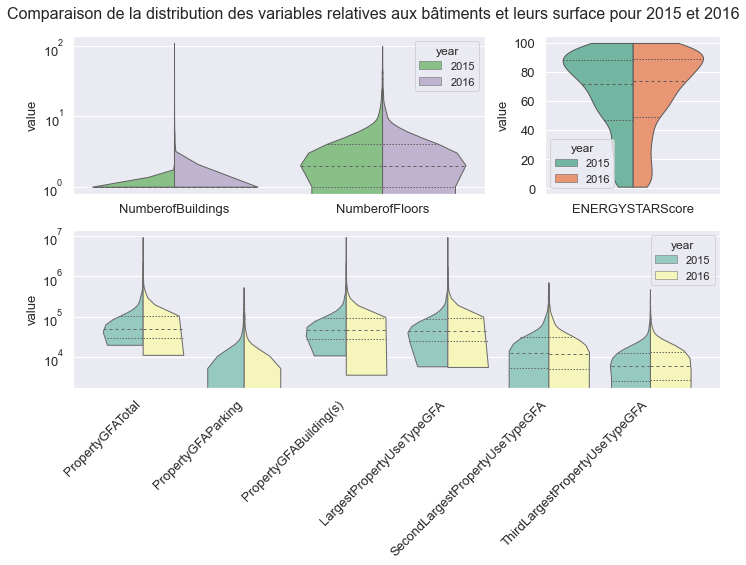

In [149]:
fig = plt.figure(figsize=(10, 8), tight_layout=True)

fig.suptitle("Comparaison de la distribution des variables relatives aux bâtiments et leurs surface pour 2015 et 2016")

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan=3, rowspan=1)

sns.violinplot(ax=ax1, data=df_nb, x="variable", y="value", hue="year", split=True, palette="Accent", 
               inner="quartiles", scale="count", cut=0, linewidth=1)
sns.violinplot(ax=ax2, data=df_ess, x="variable", y="value", hue="year", split=True, palette="Set2", 
               inner="quartiles", scale="count", cut=0, linewidth=1)
sns.violinplot(ax=ax3, data=df_surf, x="variable", y="value", hue="year", split=True, palette="Set3", 
               inner="quartiles", scale="count", cut=0, linewidth=1)

ax3.set_xticklabels(["PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)",
                    "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA",
                    "ThirdLargestPropertyUseTypeGFA"], rotation = 45, ha="right")
ax1.semilogy()
ax3.semilogy()
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

#fig.savefig("violins_buildings.png", bbox_inches="tight", dpi=150);

Il n'y a pas de différence significative entre les données de 2015 et 2016 : les gammes de valeurs sont très similaires. Il y a seulement une donnée portant sur plus de 100 bâtiments en 2016 qui a des valeurs plus fortes.

Text(0.5, 0, '')

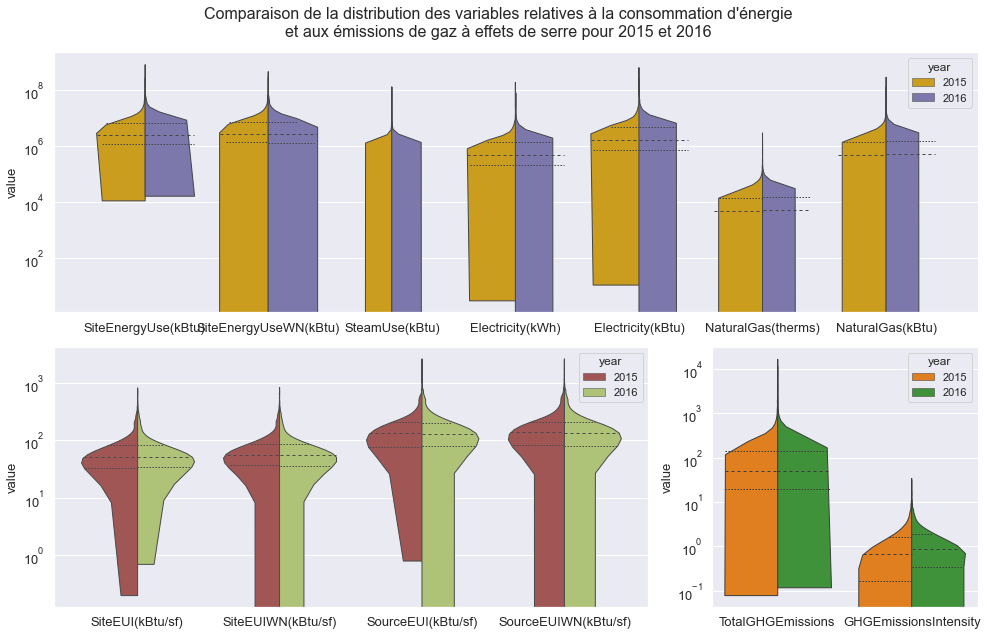

In [150]:
fig = plt.figure(figsize=(14, 9), tight_layout=True)

fig.suptitle("Comparaison de la distribution des variables relatives à la consommation d'énergie\net aux émissions de gaz à effets de serre pour 2015 et 2016")

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan=3, rowspan=1)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan=2, rowspan=1)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(1, 2), colspan=1, rowspan=1)

sns.violinplot(ax=ax1, data=df_nrj, x="variable", y="value", hue="year", split=True, palette="Dark2_r", 
               inner="quartiles", scale="count", cut=0, linewidth=1)
sns.violinplot(ax=ax2, data=df_nrjsurf, x="variable", y="value", hue="year", split=True, palette="tab20b_r", 
               inner="quartiles", scale="count", cut=0, linewidth=1)
sns.violinplot(ax=ax3, data=df_ghge, x="variable", y="value", hue="year", split=True, palette="Paired_r", 
               inner="quartiles", scale="count", cut=0, linewidth=1)

ax1.semilogy()
ax2.semilogy()
ax3.semilogy()
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

#fig.savefig("violins_nrj.png", bbox_inches="tight", dpi=150);

Sur les variables de consommation d'énergie non plus on ne retrouve pas de différence significative (excepté les valeurs pour l'ensemble de plus de 100 bâtiments identifié plus tôt).

On va comparer les valeurs pour les bâtiments ayant des données pour 2015 **ET** 2016.

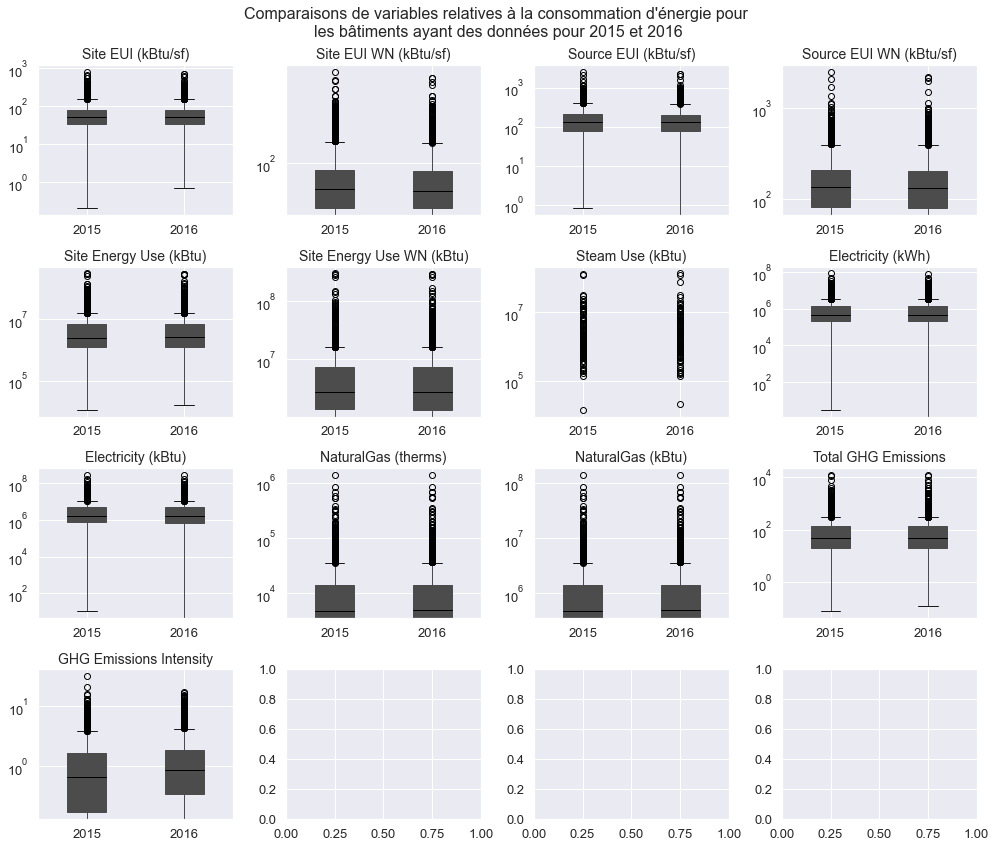

In [151]:
fig, ax = plt.subplots(4, 4, figsize=(14, 12), tight_layout=True)

fig.suptitle("Comparaisons de variables relatives à la consommation d'énergie pour \nles bâtiments ayant des données pour 2015 et 2016")

for axe, col, titre in zip([(0,0), (0,1), (0,2), (0,3), (1,0), (1,1), (1,2), (1,3), (2,0), (2,1), (2,2), 
                                (2,3), (3,0)],
                                ["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)", 
                                "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)","Electricity(kWh)", 
                                 "Electricity(kBtu)", "NaturalGas(therms)", "NaturalGas(kBtu)", "TotalGHGEmissions",
                                "GHGEmissionsIntensity"],
                                ["Site EUI (kBtu/sf)", "Site EUI WN (kBtu/sf)", "Source EUI (kBtu/sf)", "Source EUI WN (kBtu/sf)", 
                                "Site Energy Use (kBtu)", "Site Energy Use WN (kBtu)", "Steam Use (kBtu)","Electricity (kWh)", 
                                 "Electricity (kBtu)", "NaturalGas (therms)", "NaturalGas (kBtu)", "Total GHG Emissions",
                                "GHG Emissions Intensity"]):
    
    s1 = data2015_clean[data2015_clean["OSEBuildingID"].isin(OSEBuildingID_clean['intersection'])][col].rename("2015")
    s2 = data2016_clean[data2016_clean["OSEBuildingID"].isin(OSEBuildingID_clean['intersection'])][col].rename("2016")
    data = pd.concat([s1, s2], axis=1)
    
    data.boxplot(ax=ax[axe], patch_artist=True, widths=0.4, fontsize=13, medianprops={"color":"black"})
    
    ax[axe].set_title(titre)
    ax[axe].semilogy()

#fig.savefig("boxplot_var_batcommuns_2015_2016.png", bbox_inches="tight", dpi=150)

On en remarque pas de différences notables dans les distributions, excepté une valeur forte pour une donnée dans l'intensité des émissions en 2015.

## Outliers

On va regarder de plus près les valeurs abberantes. Et d'abord créer une catégorie `Expected` pour les valeurs qui ne sont pas des outliers à priori (`NaN` dans la colonne `Outlier`). Puis regarder la distribution de ces valeurs.

In [152]:
data2015_clean.loc[data2015_clean["Outlier"].isnull(), "Outlier"]="Expected"
data2016_clean.loc[data2016_clean["Outlier"].isnull(), "Outlier"]="Expected"
data2015_clean.Outlier.unique()

array(['Expected', 'High outlier', 'Low outlier'], dtype=object)

In [153]:
sns.set_theme(style="darkgrid")
plt.rcParams.update({"axes.titlesize":15, "axes.labelsize":14, "xtick.labelsize":14, "ytick.labelsize":14})

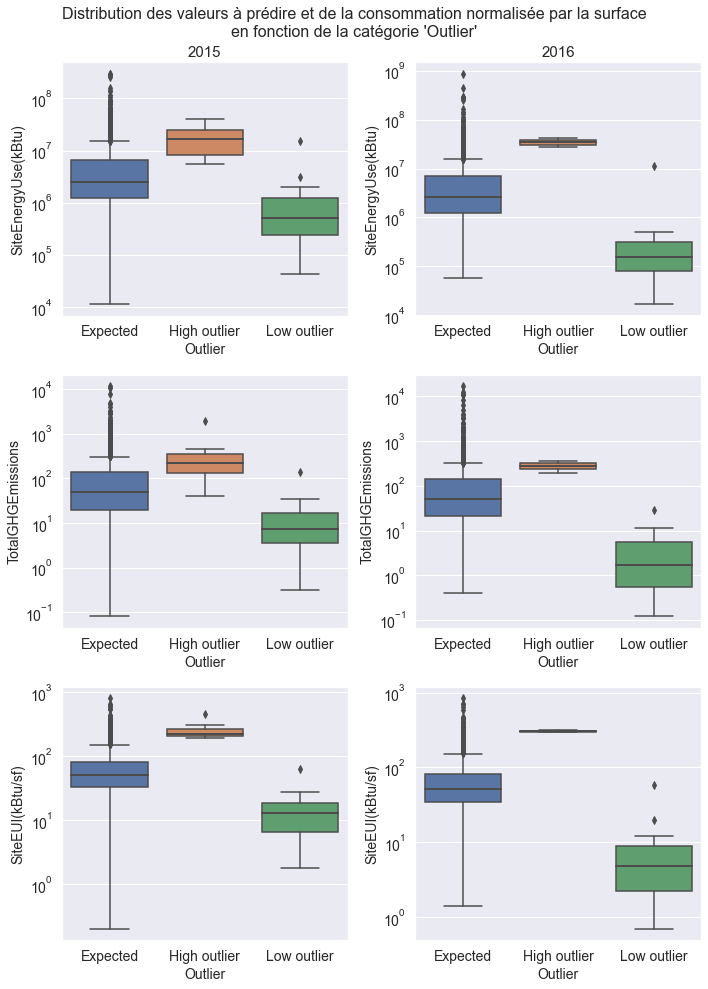

In [154]:
fig, ax = plt.subplots(3, 2, figsize=(10,14), tight_layout=True)

fig.suptitle("Distribution des valeurs à prédire et de la consommation normalisée par la surface\nen fonction de la catégorie 'Outlier'")

variables = ["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "TotalGHGEmissions",
       "SiteEUI(kBtu/sf)", "SiteEUI(kBtu/sf)"]
axes = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

data_toplot = [data2015_clean, data2016_clean, data2015_clean, data2016_clean, data2015_clean, data2016_clean]

for data, var, axe in zip(data_toplot, variables, axes):
    
    sns.boxplot(ax=ax[axe], data=data, x="Outlier", y=var, medianprops={"linewidth":2})
    ax[axe].semilogy()

ax[0, 0].set_title("2015")
ax[0, 1].set_title("2016");

#fig.savefig("outliers.png", bbox_inches="tight", dpi=150)

On voit que certaines valeurs très élevées ne sont pas catégorisées comme outlier, et qu'il n'y a pas de limite franche entre les boxplots, même en regardant la variable "Site EUI (kBtu/sf)" qui représente la consommation d'énergie totale normalisée par la surface. Il y a du recoupement entre les valeurs attendues et les outliers. De plus les catégories `High outlier`et `Low outlier`ne sont pas tout à fait identiques pour 2015 et 2016.

In [155]:
print(f"Nombre d'outliers pour 2015 : {data2015_clean[data2015_clean['Outlier']!='Expected'].shape[0]}")
print(f"Nombre d'outliers pour 2016 : {data2016_clean[data2016_clean['Outlier']!='Expected'].shape[0]}")
print(f"Default data 2015: {data2015_clean[data2015_clean['DefaultData']==True].shape[0]}")
print(f"Default data 2016: {data2016_clean[data2016_clean['DefaultData']==True].shape[0]}")

Nombre d'outliers pour 2015 : 28
Nombre d'outliers pour 2016 : 16
Default data 2015: 184
Default data 2016: 87


Il y a plus de valeurs aberrantes (outliers) et de données estimées (et non mesurées) pour 2015 que pour 2016.

## Fusion des données de 2015 et 2016

On voit qu'il n'y a globalement pas de grosse différence entre les données de 2015 et 2016 (donc à priori pas de climat particulièrement froid ou chaud qui pousserait à une consommation d'énergie plus importante sur l'une des 2 années). Les données sont consistantes, et on va pouvoir combiner les 2 datasets.

Pour les bâtiments ayant des données pour 2015 et 2016, on va sélectionner l'année 2016 dans la mesure où il y a moins d'outliers et de données estimées pour cette année là. On va donc garder l'ensemble du dataset de 2016 et ajouter les bâtiments qui ne sont répertoriés que pour 2015.

On va également supprimer les colonnes inutiles pour notre analyse :
* colonnes hors sujet ne concernant pas la consommation d'énergie
* énergies exprimées dans une autre unité que kBtu (sera de toute façon proportionnel et redondant avec la valeur en kBtu)
* énergie "weather normalized" (WN) : nous n'avons pas les valeurs pour tous les types d'énergie et cela serait intéressant uniquement si l'on avait des paramètres météo à utiliser pour la prédiction

In [156]:
# Concaténation 2015-2016 :
data = pd.concat([data2016_clean, data2015_clean[data2015_clean["OSEBuildingID"].isin(OSEBuildingID_clean['list1only'])]])

#Suppression des colonnes sans intérêt
data.drop(columns=["SPD Beats", "City Council Districts", "Seattle Police Department Micro Community Policing Plan Areas", 
                   "2010 Census Tracts", "OtherFuelUse(kBtu)", "Comments", "Electricity(kWh)", "YearsENERGYSTARCertified",
                  "CouncilDistrictCode", "TaxParcelIdentificationNumber", "SiteEUIWN(kBtu/sf)", "SourceEUIWN(kBtu/sf)",
                  "SiteEnergyUseWN(kBtu)", "NaturalGas(therms)", "OtherFuelUse(kBtu)"], inplace=True)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00,DOWNTOWN,47.61,-122.34,1927,1.00,12.00,88434,0,88434,Hotel,Hotel,88434.00,Aucun,NaN,Aucun,NaN,60.00,81.70,182.50,7226362.50,2003882.00,3946027.00,1276453.00,False,Compliant,Expected,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00,DOWNTOWN,47.61,-122.33,1996,1.00,11.00,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,61.00,94.80,176.10,8387933.00,0.00,3242851.00,5145082.00,False,Compliant,Expected,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00,DOWNTOWN,47.61,-122.34,1969,1.00,41.00,956110,196718,759392,Hotel,Hotel,756493.00,Parking,NaN,Restaurant,NaN,43.00,96.00,241.90,72587024.00,21566554.00,49526664.00,1493800.00,False,Compliant,Expected,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.00,DOWNTOWN,47.61,-122.34,1926,1.00,10.00,61320,0,61320,Hotel,Hotel,61320.00,Parking,NaN,Restaurant,NaN,56.00,110.80,216.20,6794584.00,2214446.25,2768924.00,1811213.00,False,Compliant,Expected,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.00,DOWNTOWN,47.61,-122.34,1980,1.00,18.00,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.00,Parking,68009.00,Swimming Pool,0.00,75.00,114.80,211.40,14172606.00,0.00,5368607.00,8803998.00,False,Compliant,Expected,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,25042,2015,NonResidential,Other,ALAN FRIEDMAN BUILDING,1701 18TH AVE S,SEATTLE,WA,98144,GREATER DUWAMISH,47.58809497,-122.310103,1966,1.00,2.00,33332,0,33332,"Outpatient Rehabilitation/Physical Therapy, Pa...",Outpatient Rehabilitation/Physical Therapy,33332.00,Parking,0.00,Office,NaN,NaN,19.90,37.70,662012.00,0.00,268361.00,393662.00,False,Compliant,Expected,22.78,0.65
2408,25455,2015,NonResidential,Other,DUCATI SEATTLE,711 9TH AVE N,SEATTLE,WA,98109,MAGNOLIA / QUEEN ANNE,47.62617011,-122.3401021,1922,1.00,1.00,23050,0,23050,Automobile Dealership,Automobile Dealership,23050.00,Other,NaN,Parking,NaN,NaN,186.20,373.80,4291789.00,0.00,1966049.00,2325821.00,False,Compliant,Expected,137.23,5.59
2991,27639,2015,NonResidential,Other,TEATRO ZINZANNI,225 ROY ST,SEATTLE,WA,98109,MAGNOLIA / QUEEN ANNE,47.62526703,-122.35187531,2008,1.00,2.00,23098,0,23098,Performing Arts,Performing Arts,23098.00,Parking,NaN,Office,NaN,NaN,132.40,270.90,3058638.00,0.00,1457443.00,1601256.00,False,Compliant,Expected,95.20,3.85
3037,27829,2015,NonResidential,Small- and Mid-Sized Office,EAST PIKE BUILDING,1205 E PIKE ST,SEATTLE,WA,98122,EAST,47.613922,-122.316421,1920,1.00,2.00,21228,0,21228,Office,Office,21228.00,Other,NaN,Retail Store,NaN,64.00,37.70,118.30,799996.00,0.00,800029.00,0.00,True,Compliant,Expected,5.58,0.10


Encore un coup d'oeil à la distribution des variables dans notre dataset final.

In [157]:
plt.rcParams.update({"figure.titlesize":18, "axes.titlesize":15, "axes.labelsize":14, "xtick.labelsize":14, "ytick.labelsize":14})

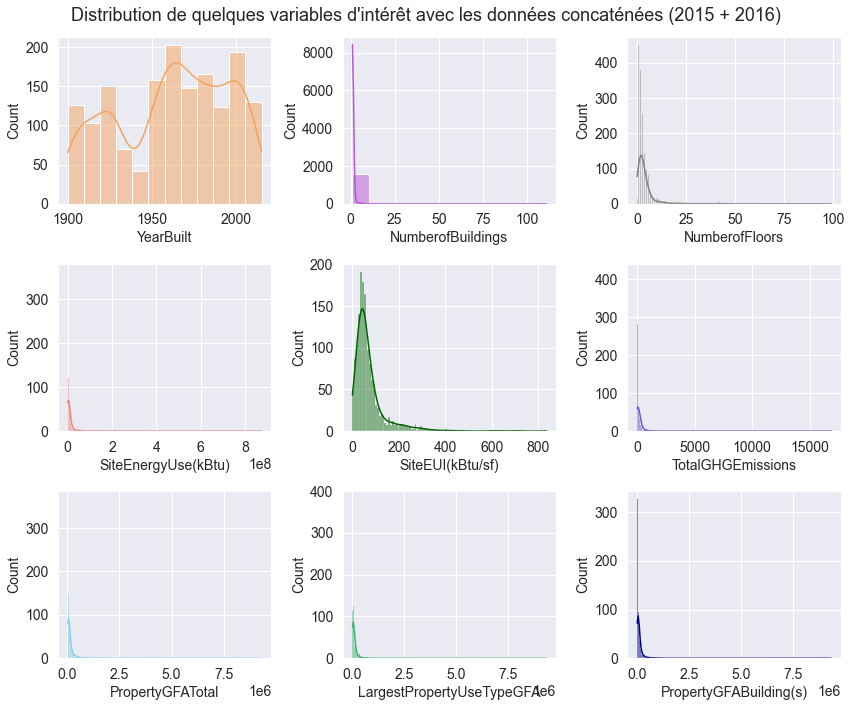

In [158]:
fig = plt.figure(figsize=(12, 10), tight_layout=True)

fig.suptitle("Distribution de quelques variables d'intérêt avec les données concaténées (2015 + 2016)")

for subplot, col, color in zip([331, 332, 333, 334, 335, 336, 337, 338, 339],
                                ["YearBuilt", "NumberofBuildings", "NumberofFloors", 
                                "SiteEnergyUse(kBtu)", "SiteEUI(kBtu/sf)", "TotalGHGEmissions", 
                                "PropertyGFATotal", "LargestPropertyUseTypeGFA", "PropertyGFABuilding(s)"],
                                ["sandybrown", "mediumorchid", "grey", "lightcoral", "darkgreen", 
                                "slateblue", "skyblue", "mediumseagreen", "darkblue"]):
    ax = fig.add_subplot(subplot)
    
    sns.histplot(ax=ax, data=data[col], color=color, kde=True)

#fig.savefig("distrib_var_final.png", bbox_inches="tight", dpi=150);

Cette représentation met bien en évidence que les distribution sont presque toutes unimodales et très décalées à gauche (vers les faibles valeurs), à part pour l'année de construction qui est très variable. De plus, les consommations d'énergie et les surfaces s'étalent sur plusieurs ordres de grandeur (jusqu'à 10^6 - 10^8).

Une autre représentation en boxplot en **échelle log** pour mieux visualiser la distribution :

In [159]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({"axes.titlesize":15, "axes.labelsize":14, "xtick.labelsize":14, "ytick.labelsize":14})

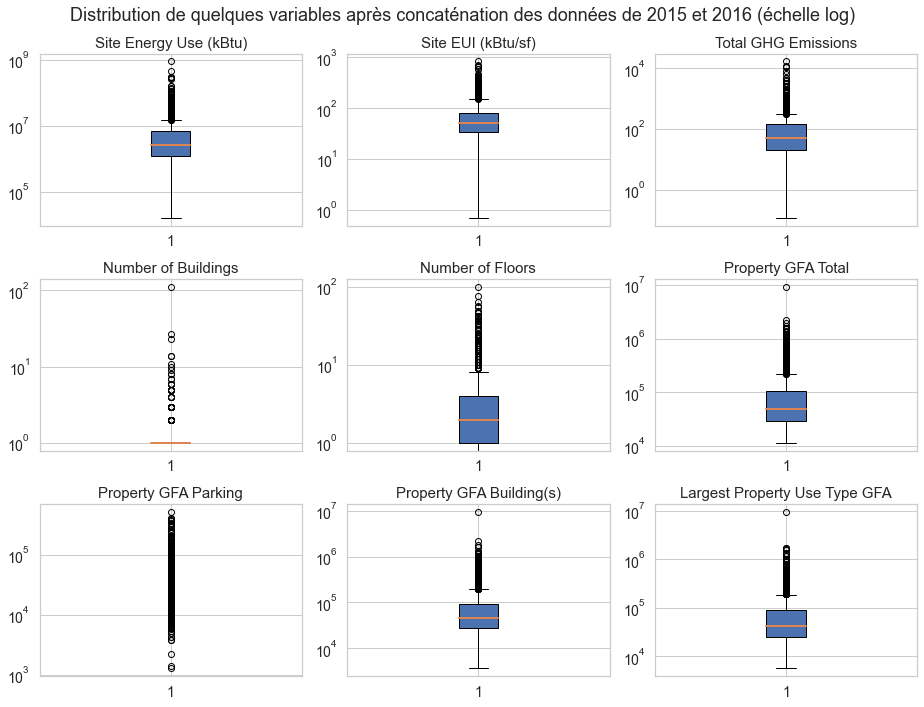

In [160]:
fig = plt.figure(figsize=(13, 10), tight_layout=True)

fig.suptitle("Distribution de quelques variables après concaténation des données de 2015 et 2016 (échelle log)")

for subplot, col, titre in zip([331, 332, 333, 334, 335, 336, 337, 338, 339],
                            ["SiteEnergyUse(kBtu)", "SiteEUI(kBtu/sf)","TotalGHGEmissions", "NumberofBuildings", 
                            "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", 
                            "LargestPropertyUseTypeGFA"],
                            ["Site Energy Use (kBtu)", "Site EUI (kBtu/sf)", "Total GHG Emissions", "Number of Buildings", 
                            "Number of Floors", "Property GFA Total", "Property GFA Parking", "Property GFA Building(s)", 
                            "Largest Property Use Type GFA"]):

    ax = fig.add_subplot(subplot)
    
    ax.boxplot(data[col], patch_artist=True, medianprops={"linewidth":2})
    
    ax.set_title(titre)
    ax.set_yscale("log")
    ax.tick_params(axis='y', which='both')

#fig.savefig("boxplots_concat.png", bbox_inches="tight", dpi=150);

La distribution des outliers sur le dataset final :

In [161]:
sns.set_theme(style="darkgrid")
plt.rcParams.update({"axes.titlesize":15, "axes.labelsize":14, "xtick.labelsize":14, "ytick.labelsize":14})

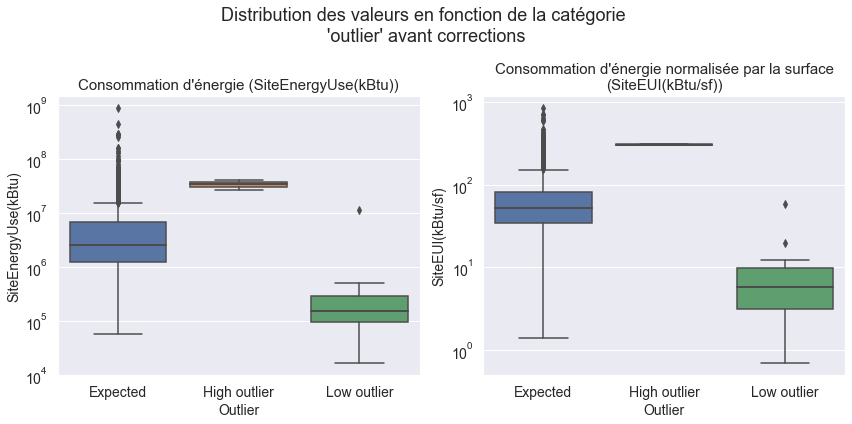

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), tight_layout=True)
fig.suptitle("Distribution des valeurs en fonction de la catégorie \n'outlier' avant corrections")

sns.boxplot(ax=ax[0], data=data, x="Outlier", y="SiteEnergyUse(kBtu)", medianprops={"linewidth":2})
ax[0].set_title("Consommation d'énergie (SiteEnergyUse(kBtu))", fontsize=15)
ax[0].semilogy()

sns.boxplot(ax=ax[1], data=data, x="Outlier", y="SiteEUI(kBtu/sf)", medianprops={"linewidth":2})
ax[1].set_title("Consommation d'énergie normalisée par la surface\n(SiteEUI(kBtu/sf))", fontsize=15)
ax[1].semilogy();

On va tenter de trouver une façon de les définri de façon logique pour supprimer les valeurs aberrantes potentiellement gênantes pour la modélisation qui va suive.

In [163]:
def IQR(df, col):
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    result = {"Q1": Q1, "Q3": Q3, "IQR":IQR, "lower_range":lower_range, "upper_range":upper_range}
    return result

In [164]:
def IDR(df, col):
    D9 = np.quantile(data[col], 0.9)
    D8 = np.quantile(data[col], 0.8)
    D7 = np.quantile(data[col], 0.7)
    D6 = np.quantile(data[col], 0.6)
    D5 = np.quantile(data[col], 0.5)
    D4 = np.quantile(data[col], 0.4)
    D3 = np.quantile(data[col], 0.3)
    D2 = np.quantile(data[col], 0.2)
    D1 = np.quantile(data[col], 0.1)
    IDR = D9 - D1
    RIDR = IDR / data[col].median()
    result = {"D1": D1, "D2": D2, "D3":D3, "D4":D4, "D5":D5, "D6": D6, "D7":D7, "D8":D8, "D9":D9, "IDR":IDR, "RIDR":RIDR}
    return result

In [165]:
iqr = IQR(data, "SiteEUI(kBtu/sf)")
iqr

{'Q1': 34.0749988525,
 'Q3': 81.5499992375,
 'IQR': 47.475000385,
 'lower_range': -37.13750172500001,
 'upper_range': 152.762499815}

In [166]:
idr = IDR(data, "SiteEUI(kBtu/sf)")
idr

{'D1': 19.29999924,
 'D2': 30.10000038,
 'D3': 37.59999847,
 'D4': 44.29999924,
 'D5': 52.049999235,
 'D6': 60.90000153,
 'D7': 73.56999892899998,
 'D8': 92.69999695,
 'D9': 144.5,
 'IDR': 125.20000076,
 'RIDR': 2.4053794927976044}

In [167]:
#data.loc[data["SiteEUI(kBtu/sf)"]>366.4, "Outlier"]="High outlier"
#data.loc[(data["SiteEUI(kBtu/sf)"]>3) & (data["SiteEUI(kBtu/sf)"]<=304.2), "Outlier"]="Expected"
#data.loc[data["SiteEUI(kBtu/sf)"]<=3, "Outlier"]="Low outlier"

Il semble à priori plus logique d'utiliser `SiteEUI(kBtu/sf)` car la consommation énergétique est principalement influencée par la surface, et le caractère aberrant ou non de la mesure devrait prendre ce facteur en compte. Mais après plusieurs essais et aller-retours avec les modèles, il semble que, en pratique, les modèles soient plus performants simplement en supprimant les valeurs les plus élevées de consommation (`SiteEnergyUse(kBtu)`). Par ailleurs, supprimer trop de données fait tomber les modèles dans le sous-apprentissage. On va donc faire en sorte de conserver au moins 1600 bâtiments dans notre dataset final.

Il faudrait creuser cette question avec les experts métier pour trouver la meilleure définition possible, et nettoyer les outliers de façon moins arbitraire. On va ici ce contenter d'une solution basique :

In [168]:
data.loc[data["SiteEnergyUse(kBtu)"]>=100_000_000, "Outlier"] = "High outlier"
data.loc[data["SiteEnergyUse(kBtu)"]<100_000_000, "Outlier"] = "Expected"

On obtient donc une classification comme suit :

[]

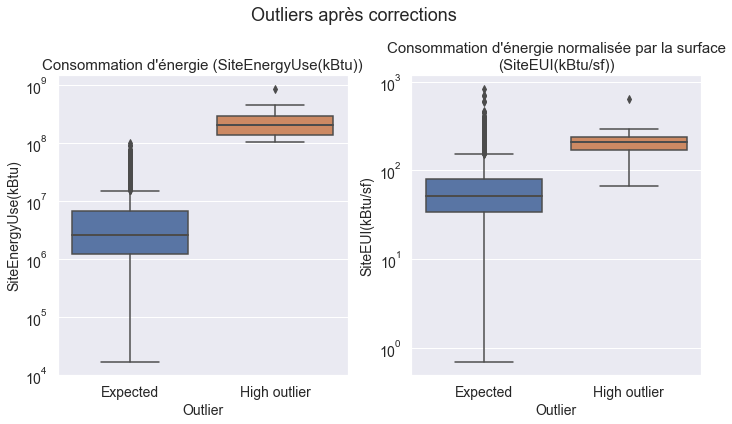

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(10,6), tight_layout=True)
fig.suptitle("Outliers après corrections")

sns.boxplot(ax=ax[0], data=data, x="Outlier", y="SiteEnergyUse(kBtu)", medianprops={"linewidth":2})
ax[0].set_title("Consommation d'énergie (SiteEnergyUse(kBtu))", fontsize=15)
ax[0].semilogy()

sns.boxplot(ax=ax[1], data=data, x="Outlier", y="SiteEUI(kBtu/sf)", medianprops={"linewidth":2})
ax[1].set_title("Consommation d'énergie normalisée par la surface\n(SiteEUI(kBtu/sf))", fontsize=15)
ax[1].semilogy()

#fig.savefig("outliers_apres_correc.png", bbox_inches="tight", dpi=150);

On supprime donc les "high outlier".

In [170]:
outliers_SEU = data[(data["Outlier"]=="High outlier")].index
outliers_SEU

Int64Index([35, 124, 167, 170, 340, 558, 618, 1494, 1690, 3264, 3274, 3272], dtype='int64')

In [171]:
data.drop(index=outliers_SEU, inplace=True)

## Exploration des corrélations entre variables

In [172]:
data.groupby("Neighborhood").mean()

,OSEBuildingID,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
Neighborhood,,,,,,,,,,,,,,,,,,,,
BALLARD,20092.46,2015.97,1961.81,1.07,2.26,52314.61,4835.36,47479.25,44020.16,18264.91,2908.64,57.02,79.06,182.66,4203646.40,0.00,2549544.37,1654102.90,105.62,1.90
CENTRAL,21486.51,2016.00,1960.61,1.24,2.53,59256.12,465.06,58791.06,52696.82,16092.90,5044.43,60.42,63.57,153.25,3724180.62,88500.50,2683055.67,952624.08,76.13,1.51
DELRIDGE,14846.02,2016.00,1975.83,1.74,1.67,73832.67,660.67,73172.00,71026.19,9176.06,2321.25,61.19,68.92,151.66,4918110.02,0.00,3006889.29,1467017.55,98.88,1.44
DELRIDGE NEIGHBORHOODS,50221.00,2016.00,1982.00,1.00,1.00,18261.00,0.00,18261.00,18261.00,NaN,NaN,NaN,51.00,126.00,932082.12,0.00,632362.01,299720.00,20.33,1.11
DOWNTOWN,10554.11,2015.98,1945.37,1.03,9.49,202797.15,26479.86,176317.29,154508.88,52917.68,18420.79,71.04,70.28,181.00,11240113.55,757258.46,8927829.91,1520498.97,201.44,1.37
EAST,20511.20,2015.96,1947.70,1.04,3.83,89569.85,19071.40,70498.45,68703.16,36934.14,9265.14,64.20,84.58,189.69,7059772.73,1359818.65,4269883.34,1427795.25,210.56,2.39
GREATER DUWAMISH,17555.09,2015.99,1962.06,1.14,1.96,72534.41,3059.53,69474.88,64511.66,19115.90,11518.16,58.37,51.52,128.13,3725165.86,0.00,2793216.16,931004.25,68.92,1.09
LAKE UNION,14191.23,2015.99,1976.77,1.03,3.96,134611.68,32322.77,102288.91,94097.07,50002.01,15359.78,69.32,86.88,226.91,9015145.51,0.00,6894606.43,2112147.23,160.24,1.36
MAGNOLIA / QUEEN ANNE,16011.54,2015.99,1971.50,1.27,3.07,89582.87,12643.75,76939.12,74435.78,28555.96,4754.76,67.99,77.33,189.25,6005901.09,195428.84,4066950.92,1679362.14,132.63,1.74


In [173]:
# Re-organisation dataframe pour plots seaborn
mean_kbtusf_b = data.groupby("BuildingType").mean().reset_index().melt(id_vars=["BuildingType"], value_vars=["ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)"])
mean_kbtu_b = data.groupby("BuildingType").mean().reset_index().melt(id_vars=["BuildingType"], value_vars=["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)","NaturalGas(kBtu)"])
mean_ghg_b = data.groupby("BuildingType").mean().reset_index().melt(id_vars=["BuildingType"], value_vars=["TotalGHGEmissions"])

mean_kbtusf_n = data.groupby("Neighborhood").mean().reset_index().melt(id_vars=["Neighborhood"], value_vars=["ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)"])
mean_kbtu_n = data.groupby("Neighborhood").mean().reset_index().melt(id_vars=["Neighborhood"], value_vars=["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)","NaturalGas(kBtu)"])
mean_ghg_n = data.groupby("Neighborhood").mean().reset_index().melt(id_vars=["Neighborhood"], value_vars=["TotalGHGEmissions"])

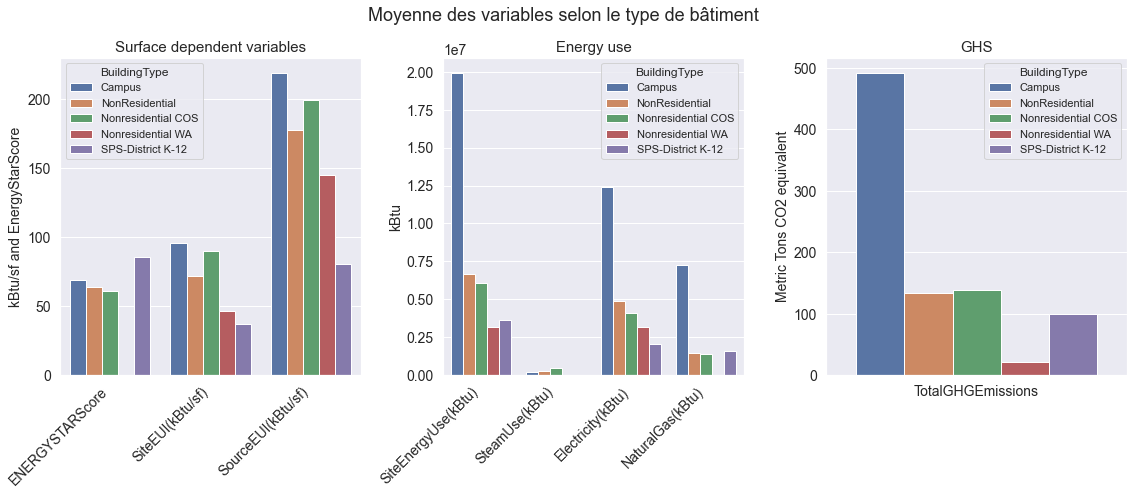

In [174]:
fig, ax = plt.subplots(1, 3, figsize=(16,7), tight_layout=True)

fig.suptitle("Moyenne des variables selon le type de bâtiment")

for axe, df, title, ylabel in zip([0, 1, 2], [mean_kbtusf_b, mean_kbtu_b, mean_ghg_b ], 
                                    ["Surface dependent variables", "Energy use", "GHS"],
                                    ["kBtu/sf and EnergyStarScore", "kBtu", "Metric Tons CO2 equivalent"]):

    sns.barplot(ax=ax[axe], x="variable", y="value", hue="BuildingType", data=df)
    
    ax[axe].set_title(title)
    ax[axe].set_ylabel(ylabel)
    ax[axe].set_xlabel("")


ax[0].set_xticklabels(labels=["ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)"], rotation=45, ha="right")
ax[1].set_xticklabels(labels=["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)","NaturalGas(kBtu)"],rotation=45, ha="right");

#fig.savefig("barplot_targets_battype.png", bbox_inches="tight", dpi=150)

Les campus, de part leur très grande surface, dominent les valeurs de consommation d'énergie. Avec les variables normalisée par la surface, les différences entre les types de bâtiments sont atténuées, mais persistent.

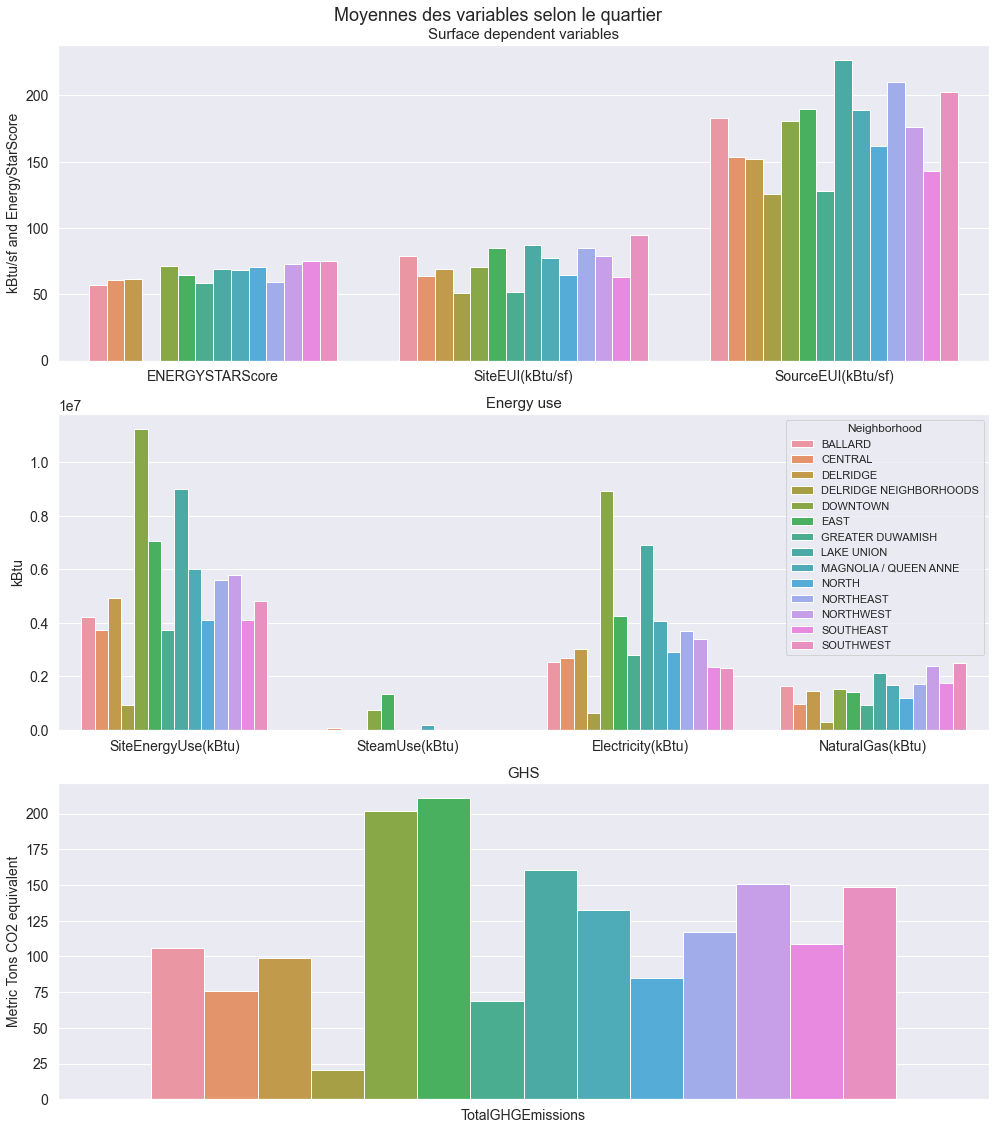

In [175]:
fig, ax = plt.subplots(3, 1, figsize=(14,16), tight_layout=True)

fig.suptitle("Moyennes des variables selon le quartier")

for axe, df, title, ylabel in zip([0, 1, 2], [mean_kbtusf_n, mean_kbtu_n, mean_ghg_n],
                                   ["Surface dependent variables", "Energy use", "GHS"],
                                   ["kBtu/sf and EnergyStarScore", "kBtu", "Metric Tons CO2 equivalent"]):

    sns.barplot(ax=ax[axe], x="variable", y="value", hue="Neighborhood", data=df)
    ax[axe].set_title(title)
    ax[axe].set_ylabel(ylabel)
    ax[axe].set_xlabel("")

ax[0].get_legend().remove()
ax[2].get_legend().remove();

#fig.savefig("barplot_targets_neighborhood.png", bbox_inches="tight", dpi=150)

Les quartiers "East," "Downtown", et "Northeast" sont ceux qui ont la plus forte consommation d'énergie et émissions de gaz à effet de serre. "Downtown" et "Northeast" restent le top 2 y compris respectivement à la surface des bâtiments,  mais "Lake Union" et "Magnolia / Queen Anne" sont légèrement supérieurs à "Downtown" dans ce cas.

Le quartier semble donc être un paramètre potentiellement important. Mais il peut exister un **facteur de confusion** : à savoir que ces différences soient plus liées au type de bâtiment qu'à leur localisation, certains quartiers regroupant générallement des bâtiments de même type (quartier industriels, centre-ville avec tous les services publiques types écoles, hôpitaux, etc... ).

Pairplots sur quelques variables :

In [176]:
data_tests = data[["BuildingType", "NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "LargestPropertyUseTypeGFA", 
                   "PropertyGFAParking", "ENERGYSTARScore", "SiteEnergyUse(kBtu)", "SteamUse(kBtu)", 
                   "Electricity(kBtu)", "NaturalGas(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity"]]

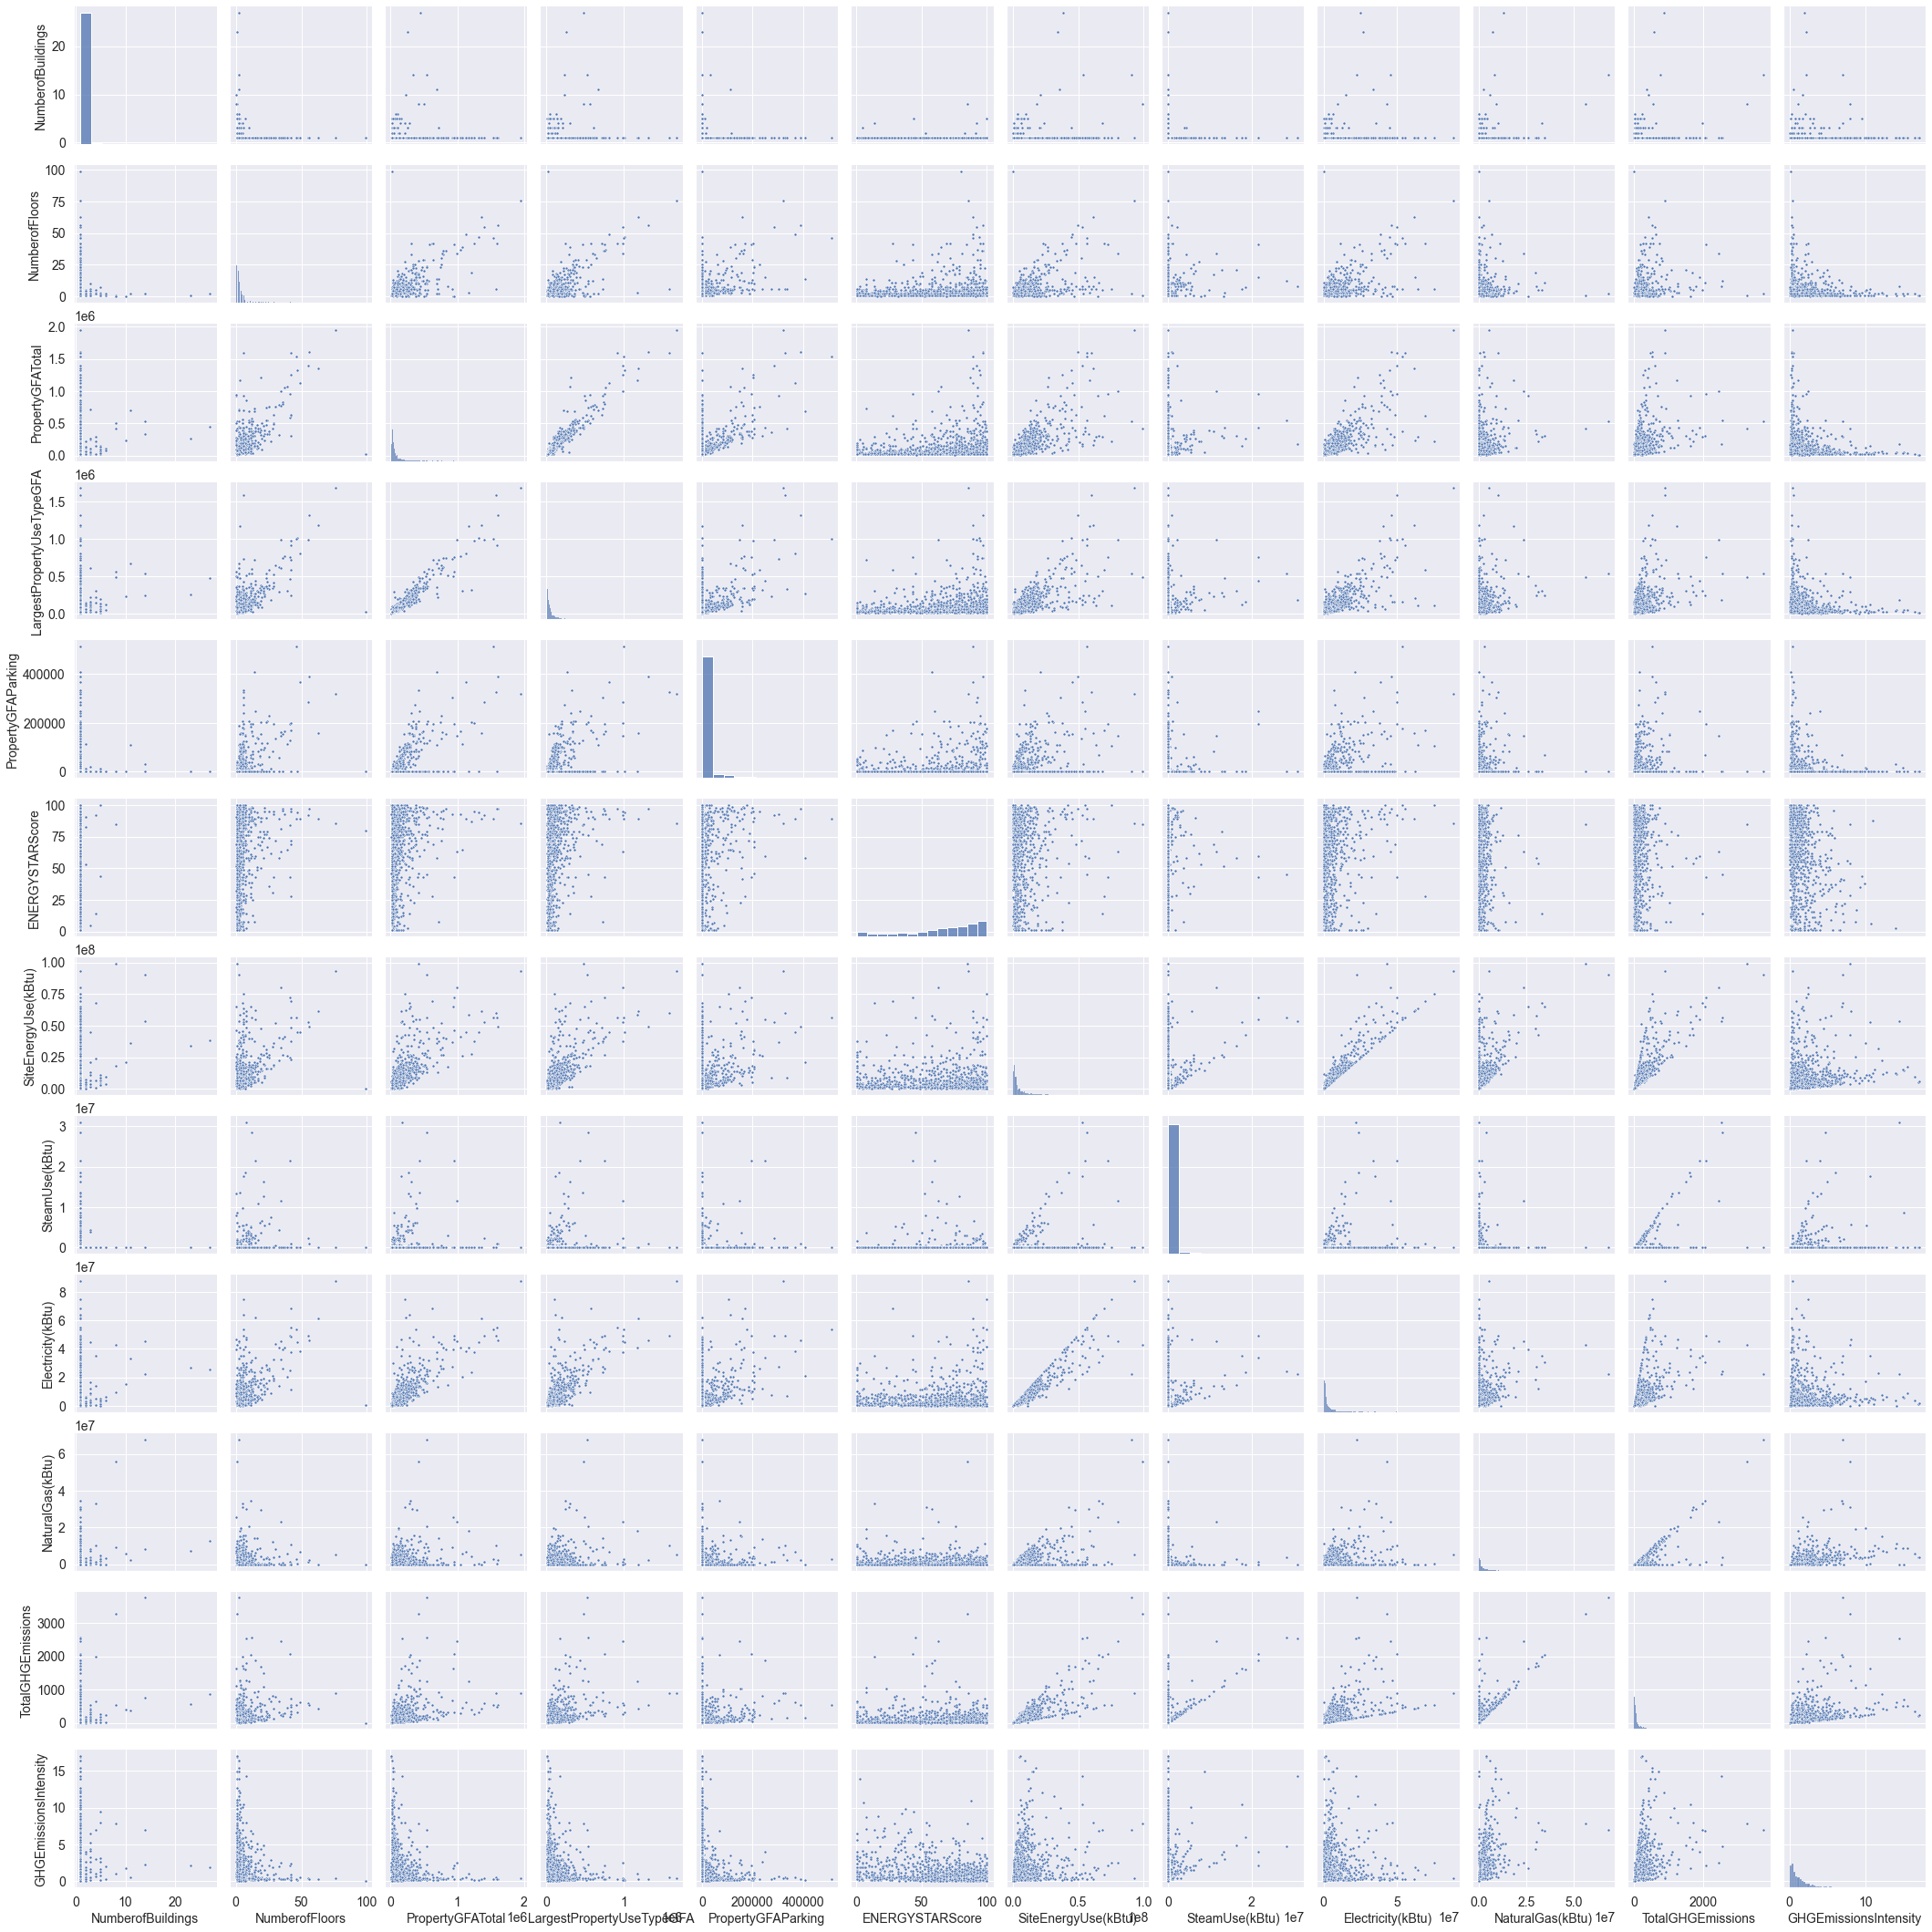

In [177]:
sns.pairplot(data_tests, markers=".");

Matrice de Spearman et p-values associées :

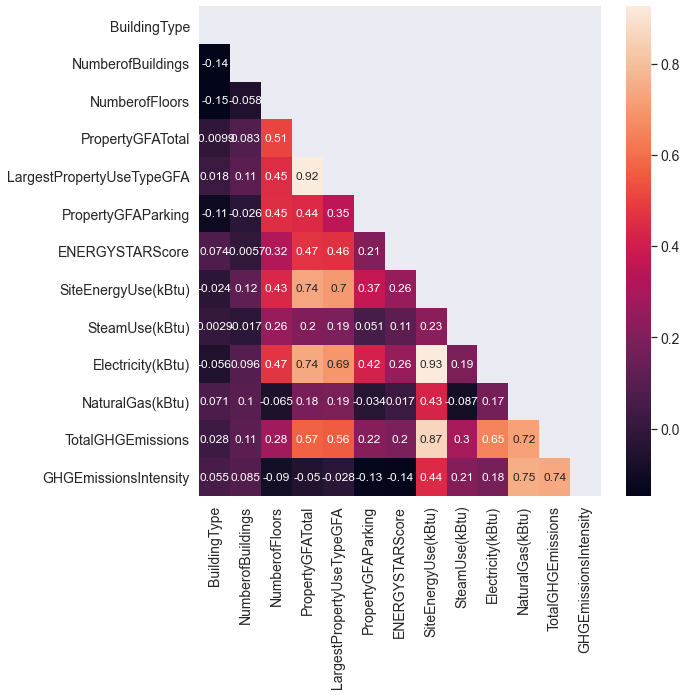

In [178]:
rho, p = stats.spearmanr(data_tests)
cols = ["BuildingType", "NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "LargestPropertyUseTypeGFA", 
        "PropertyGFAParking", "ENERGYSTARScore", "SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)", 
        "NaturalGas(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity"]
spearman_rho = pd.DataFrame(rho, index=cols, columns=cols)
spearman_p = pd.DataFrame(p, index=cols, columns=cols)

mask_tri = np.zeros_like(spearman_rho)
mask_tri[np.triu_indices_from(mask_tri)] = True

fig, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(spearman_rho, mask=mask_tri, annot=True);

#fig.savefig("heatmap_cor_spearman.png", bbox_inches="tight", dpi=150)

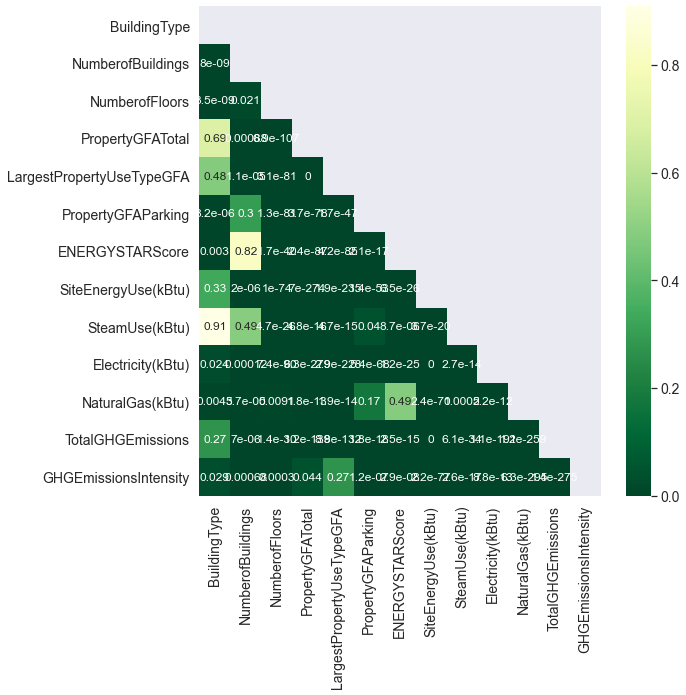

In [179]:
mask_tri = np.zeros_like(spearman_p)
mask_tri[np.triu_indices_from(mask_tri)] = True

fig, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(spearman_p, mask=mask_tri, annot=True, cmap="YlGn_r");

#fig.savefig("heatmap_p.png", bbox_inches="tight", dpi=150)

Les corrélations observées sont assez attendues, on a de fortes liaisons entre :
* la consommation d'énergie totale et la consommation de chaque type d'énergie (électricité, gaz, etc...)
* la consommation d'énergie totale et les surfaces des bâtiments/parking, nombre d'étages
* les émissions de gaz à effet de serre et la consommation d'énergie totale
* l'intensité des émissions et la quantité d'émissions

L'energy star score ne semble pas lié aux autres variables du dataset.

Un focus sur les relations entre les variables à prédire ainsi que la surface totale, le nombre de bâtiments et le nombre d'étages :

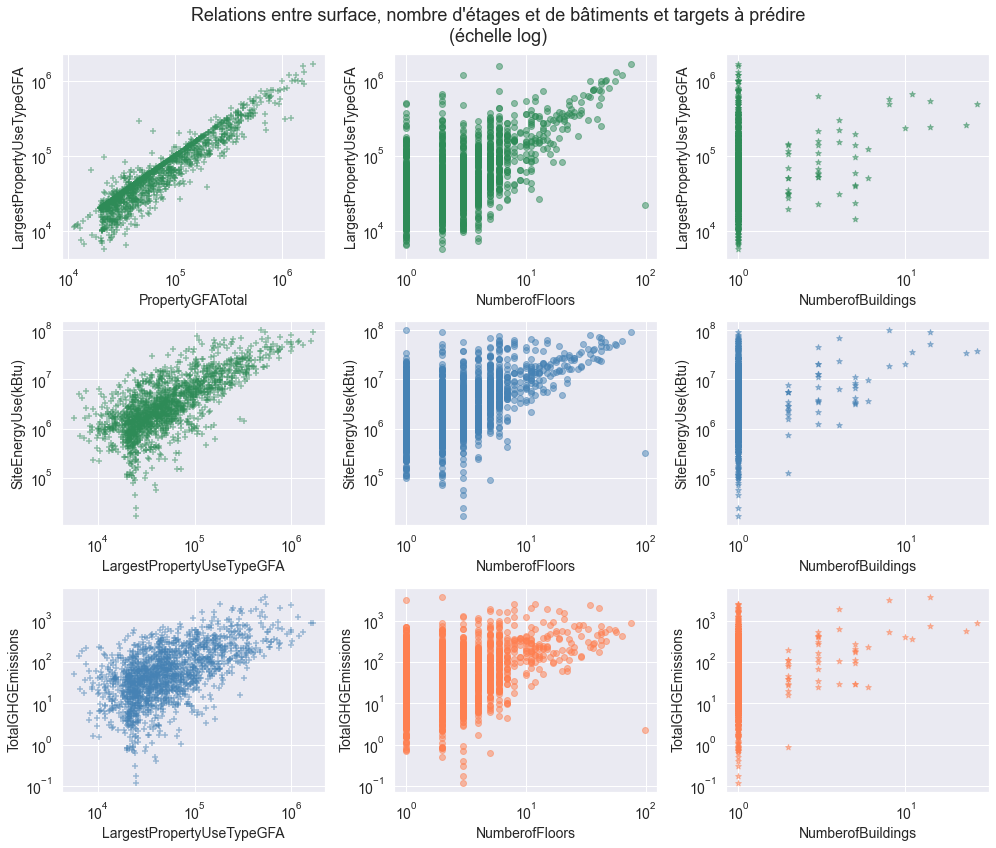

In [180]:
fig = plt.figure(figsize=(14, 12), tight_layout=True)

fig.suptitle("Relations entre surface, nombre d'étages et de bâtiments et targets à prédire\n(échelle log)")

abcisses = ["PropertyGFATotal", "NumberofFloors", "NumberofBuildings", "LargestPropertyUseTypeGFA",
            "NumberofFloors", "NumberofBuildings", "LargestPropertyUseTypeGFA", "NumberofFloors", "NumberofBuildings"]
ordonnees = ["LargestPropertyUseTypeGFA", "LargestPropertyUseTypeGFA", "LargestPropertyUseTypeGFA", "SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)",
    "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "TotalGHGEmissions", "TotalGHGEmissions"]
markers = ["+", "o", "*", "+", "o", "*", "+", "o", "*"]
colors = ["seagreen", "seagreen", "seagreen", "seagreen", "steelblue", "steelblue", "steelblue", "coral",
         "coral", "coral"]
subplots = [331, 332, 333, 334, 335, 336, 337, 338, 339]

for sub, x, y, mark, col in zip(subplots, abcisses, ordonnees, markers, colors):
    ax = fig.add_subplot(sub)
    ax.scatter(data[x], data[y], marker=mark, color=col, alpha=0.5)
    ax.loglog()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
#fig.savefig("scatter_correlations.png", bbox_inches="tight", dpi=150);

Ces graphiques montrent clairement une relation linéaire entre la surface totale (`PropertyGFATotal`) et la surface de l'usage principal (`LargestPropertyUseTypeGFA`). Les 2 targets à prédire sont aussi très liées linéairement avec ces 2 variables, et dans une moindre mesure le nombre d'étage et de bâtiments.

On voit aussi clairement qu'il sera judicieux d'utiliser le log des targets dans les modèles de machine learning car les valeurs s'étalent sur plusieurs ordres de grandeur.

## Export des données pour les modèles

In [181]:
path_data_models = os.path.join(path, "data_models.csv")

In [182]:
data.to_csv(path_data_models)

In [183]:
data.shape

(1600, 37)